# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Libraries**

In [ ]:
import warnings 
%matplotlib inline 
warnings.filterwarnings("ignore")

In [ ]:
#Import libraries 
import pandas as pd
pd.options.display.max_columns=999

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
#installing required models/package
!pip install catboost
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import models and packages
from catboost import CatBoostRegressor
import eli5 as eli
import pydotplus

import lightgbm as lgb
import missingno as msno
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


#**1. Dataset Overview**

**Import Dataset**

In [ ]:
#read the dataset file 
data=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Seoul Bike Prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

In [ ]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes



---



**Statistical Summary**

In [ ]:
#Statistical Information - Numerical features 
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Observations:

* Count of all features is same: 8760 i.e., No missings values
* Minimum and maximum number of bikes rented/day is 0 and 3556 resp.
* Average number of bikes rented/day = 704



---



**Data Properties**

In [ ]:
#datatype and count information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#check unique values of the features
data.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Observation:

* Data is recorded for:
    * 365 days and throughout the day(24 hours).
    * 4 different seasons 
    * Holiday and No Holiday Days
    * Functioning and No Functioning Days



---



#**2. Exploratory Data Analysis**

**Missing Value Analysis**

In [ ]:
#confirm the null values 
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

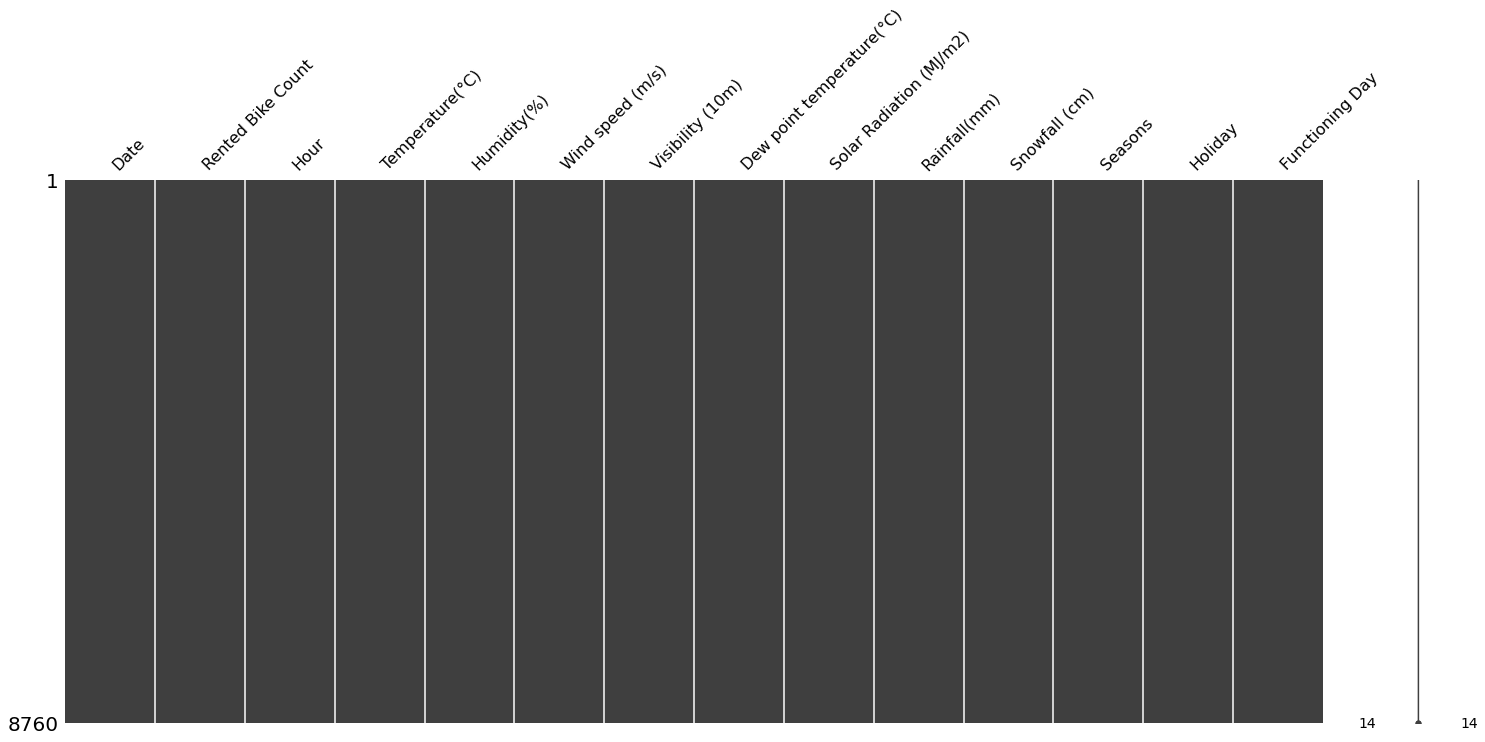

In [ ]:
# Checking missing values
msno.matrix(data)

No missing values in any of the features.



---



**Feature Engineering**

In [ ]:
# Extract month from feature- 'Date'
data['Date']=pd.to_datetime(data["Date"])
data['Month']=data['Date'].dt.month

# Extract year from the feature "date" to create "year"
year =[]
for i in range(len(data['Date'])):
  year.append(data['Date'][i].year)
data['year'] = year

#added two new columns 

In [ ]:
# Rename the column names for easy access
data.rename(columns={'Temperature(°C)':'Temperature', 'Humidity(%)': 'Humidity','Wind speed (m/s)': 'Wind Speed',"Dew point temperature(°C)": 'Dew point temperature','Visibility (10m)':'Visibility', "Solar Radiation (MJ/m2)": 'Solar radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)': 'Snowfall' },inplace=True)

In [ ]:
# Change the datatype of categorical columns to 'categorical'

categorical_cols=['Seasons','Holiday','Functioning Day','Hour',"Date","Month"]
for col in categorical_cols:
  data[col]=data[col].astype("category")

Numerical_cols=['Temperature','Humidity','Visibility','Wind Speed','Dew point temperature','Solar radiation','Rainfall','Snowfall']
for col in Numerical_cols :
  data[col] = data[col].astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   8760 non-null   category
 1   Rented Bike Count      8760 non-null   int64   
 2   Hour                   8760 non-null   category
 3   Temperature            8760 non-null   float64 
 4   Humidity               8760 non-null   float64 
 5   Wind Speed             8760 non-null   float64 
 6   Visibility             8760 non-null   float64 
 7   Dew point temperature  8760 non-null   float64 
 8   Solar radiation        8760 non-null   float64 
 9   Rainfall               8760 non-null   float64 
 10  Snowfall               8760 non-null   float64 
 11  Seasons                8760 non-null   category
 12  Holiday                8760 non-null   category
 13  Functioning Day        8760 non-null   category
 14  Month                  8760 non-null   c



---



**Outlier Analysis**

<Figure size 720x360 with 0 Axes>

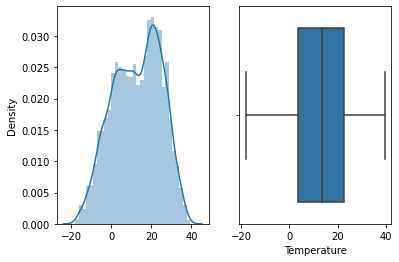

<Figure size 720x360 with 0 Axes>

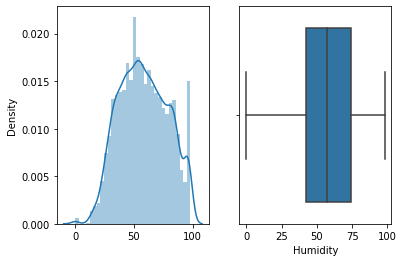

<Figure size 720x360 with 0 Axes>

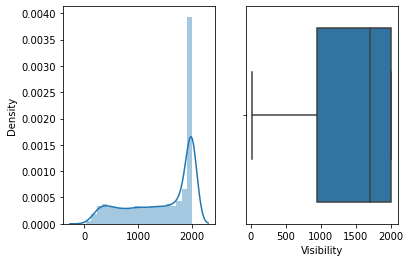

<Figure size 720x360 with 0 Axes>

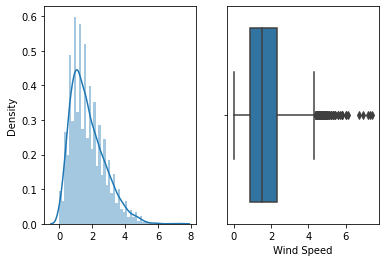

<Figure size 720x360 with 0 Axes>

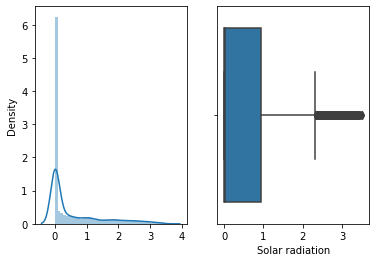

<Figure size 720x360 with 0 Axes>

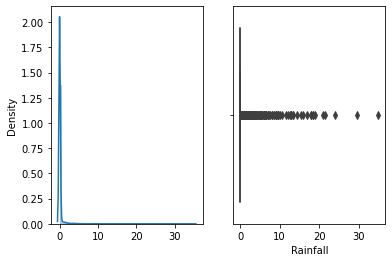

<Figure size 720x360 with 0 Axes>

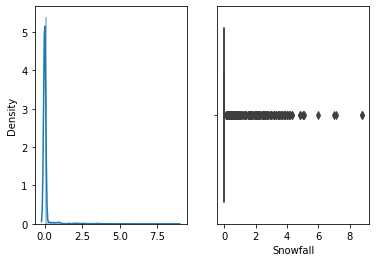

<Figure size 720x360 with 0 Axes>

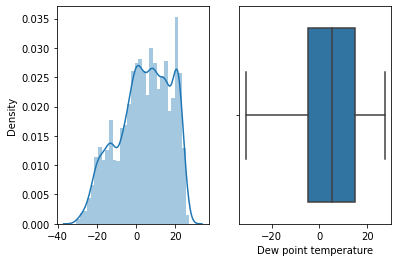

<Figure size 720x360 with 0 Axes>

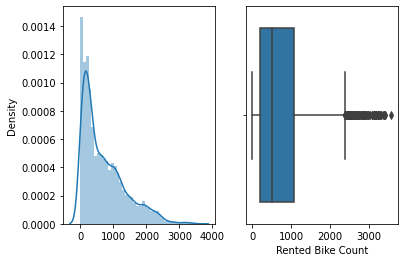

In [ ]:
# Plot the density distribution and boxplot for each of the numerical features and target variable.
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall','Dew point temperature', 'Rented Bike Count']

for col in numerical_cols[0:]:
    fig = plt.figure(figsize=(10,5))
    feature=data[col]
    fig, axes = plt.subplots(1, 2)
    sns.distplot(x=feature,ax=axes[0])
    sns.boxplot(x=feature,ax=axes[1])
plt.show()

Observation:

* Features namely, Wind Speed, Solar Radiation, Rainfall, Snowfall have outliers, that are handled during feature scaling in data modelling.
* Dependent variable 'Rented Bike Count' has outliers.
Target variable is subjected to the transformation as shown below.

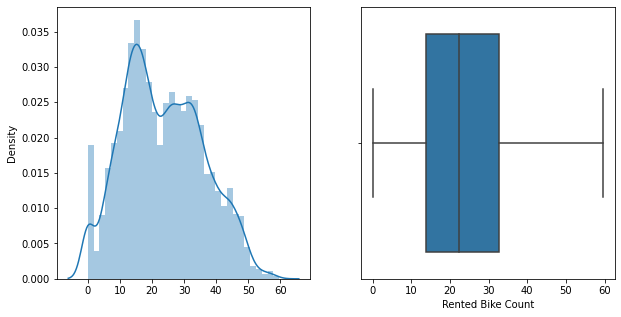

In [ ]:
# Transforming the target variable by 'squre root' method

f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.distplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[0])
sns.boxplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[1])

Observation:
* The right skewed density distribution of the target variable is converted to normal distribution. And the outliers are handled.



---



**Correlation Analysis**

Heatmap (correlation matrix)

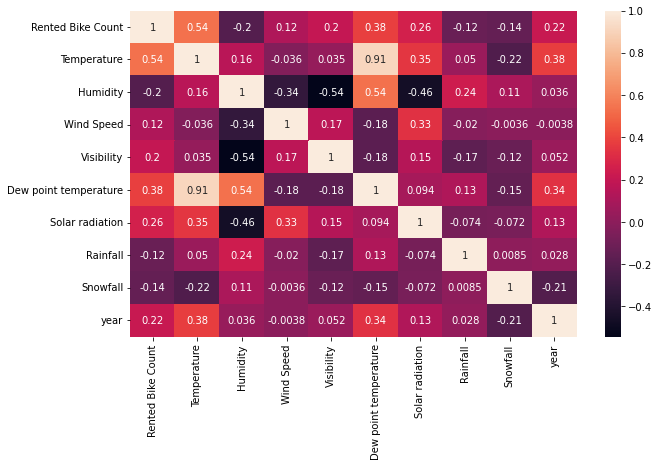

In [ ]:
# Correlation matrix of the numerical features.
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

Observation:

* Temperature has a correlation (0.54) with the count of bike-rents.
* Temperature and dew-point temperature are highly correlated. One of the features could be dropped later.
* Humidity is positively correlated(0.54) with dew-point temperature as much as it is negatively correlated(-0.54) with Visibility.
* Solar Radiation has a slight negative correlation with Humidity.
* The correlation can be observed in the regression plots below. 

Regression Plots 

<Figure size 720x432 with 0 Axes>

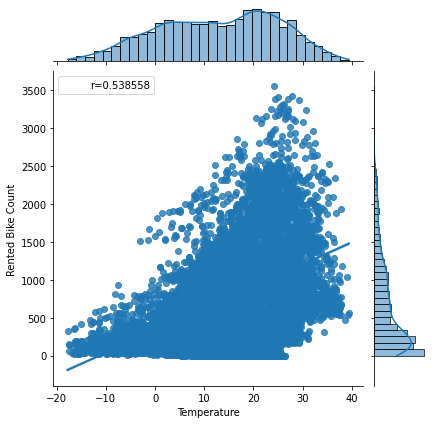

<Figure size 720x432 with 0 Axes>

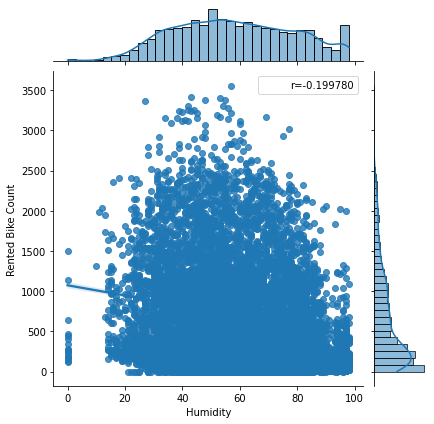

<Figure size 720x432 with 0 Axes>

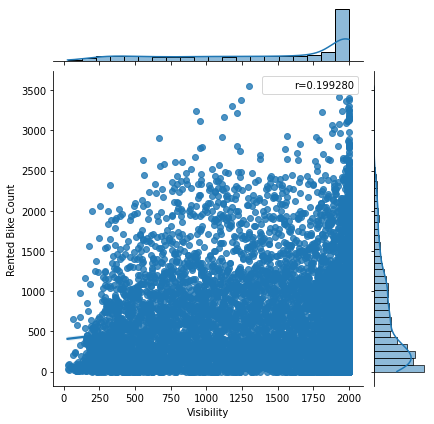

<Figure size 720x432 with 0 Axes>

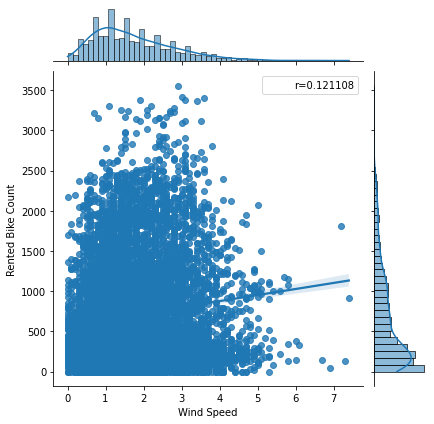

<Figure size 720x432 with 0 Axes>

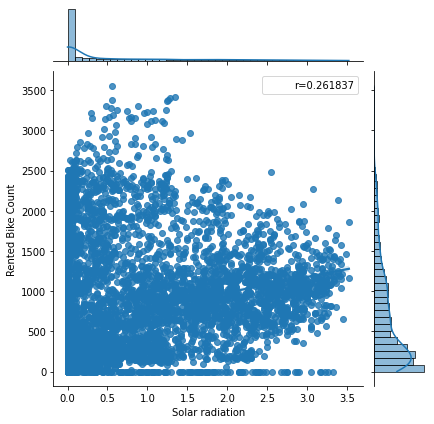

<Figure size 720x432 with 0 Axes>

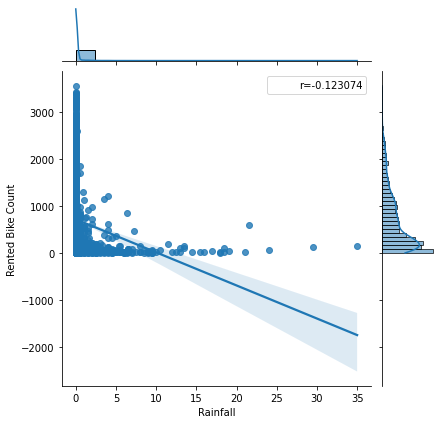

<Figure size 720x432 with 0 Axes>

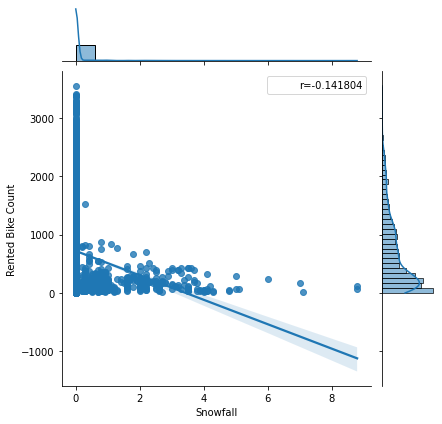

In [ ]:
# Regression plot for the numerical features v/s bike rental count along with the correlation coefficient.
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall']
for col in numerical_cols[0:]:
    fig = plt.figure(figsize=(10, 6))
    feature = data[col]
    label = data['Rented Bike Count']
    graph = sns.jointplot(data=data,x=feature, y=label,kind='reg')
    r, p = stats.pearsonr(feature, label)
    phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
    graph.ax_joint.legend([phantom],['r={:f}'.format(r)])
plt.show()

**Observation**

* There is positive linear relation between the target variable and the features- Temperature, Wind speed, Visibility, Solar radiation.
* There is negative linear relation between the target variable and the features- Humidity, Rainfall, Snowfall 



---



**Univariate Analysis**

Bike Rental Analysis: At particular hour of the day




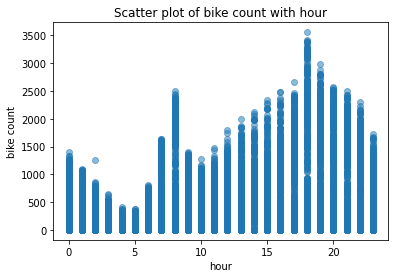

In [ ]:
# Scatter plot: Bike Rental Count v/s Hour
plt.scatter(data['Hour'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()


* Bike rentals are the highest during 8:00 am and 6:00 pm, indicating the peak hours.
* Bikes tend to be rented more in the evenings than in mornings.


Bike Rental Analysis: Count v/s Year 

[Text(0.5, 1.0, 'Bike Rent Count per year')]

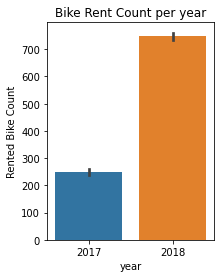

In [ ]:

fig, ax=plt.subplots(figsize=(3,4))
sns.barplot(data=data,x='year',y='Rented Bike Count')
ax.set(title='Bike Rent Count per year')

* Data collected over two years.



---



**Multivariate Analysis**

1. Bike Rental Count Analysis: Count v/s Seasons

In [ ]:
#Bike rental count per season
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Plot the bike rental count per season in a pie chart 
seasons_data = data.groupby(['Seasons'])['Rented Bike Count'].max().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)

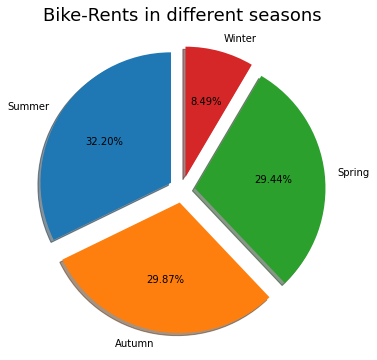

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
rents = seasons_data['Rented Bike Count']
plt.pie(rents, labels = seasons_data['Seasons'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1], shadow = True )
plt.title('Bike-Rents in different seasons', {'fontsize': 18})
plt.show()

* Bike rental count is highest during summers, indicating the ideal temperature for use of bikes.

2. Bike Rental Count Analysis: Throughout the day for all seasons




[Text(0.5, 1.0, 'Bikes Rented in different Seasons')]

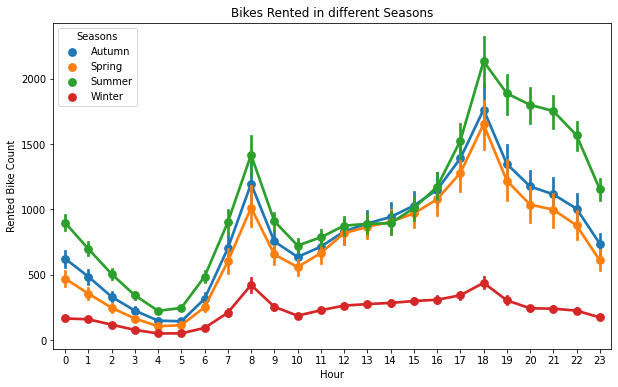

In [ ]:
#pointplot: Bike rental count v/s hour wrt seasons 
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Seasons", ax=ax)
ax.set(title="Bikes Rented in different Seasons")

Observation:

* Winter has comparatively lesser bike rents.
* 8:00 am and 6:00 pm are the peak hours of bike rent in all seasons.
* Bike rents in the morning are lesser than that in the evening.
* Summers have the highest bike rents, indicating ideal temperature.


3. Bike Rental Count Analysis: Holiday v/s No Holiday 

[Text(0.5, 1.0, 'Bikes Rented on Holidays vs No Holidays')]

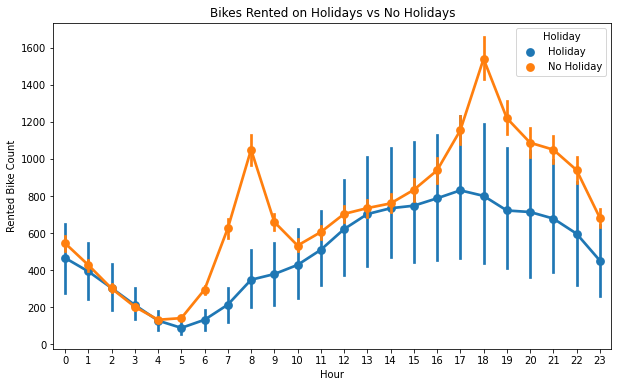

In [ ]:
#pointplot: Bike rental count v/s hour wrt Holiday/ No Holiday

fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Holiday", ax=ax)
ax.set(title="Bikes Rented on Holidays vs No Holidays")

Observation:

* On No Holidays, bike rents start around 5:00 am and are highest during peak hours( 8:00 am and 6:00 pm), indicating office hours.
* On Holidays the bike rents are casually increasing from 8:00 am to 5:00 pm and decrease afterrward.

4. Bike Rental Count Analysis: Functional Day v/s No Functional Day

[Text(0.5, 1.0, 'Bikes Rented on Functional Days vs No Functional Days')]

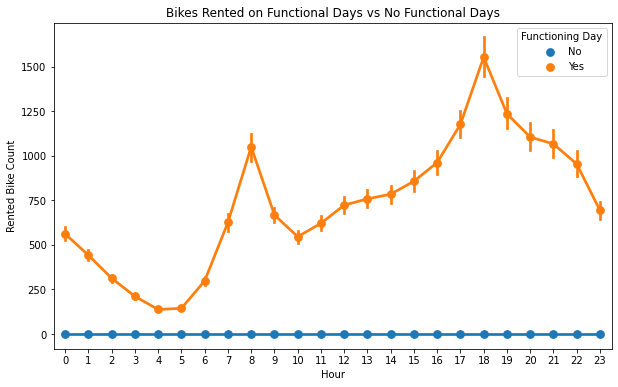

In [ ]:
#pointplot: Bike rental count v/s hour wrt Functioning Day/ No Functioning Day

fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Functioning Day", ax=ax)
ax.set(title="Bikes Rented on Functional Days vs No Functional Days")

Observation: 

* No bike-rents were observed on No Functional days.
* Bike-rents follow a regular trend on functional days.

5. Bike Rental Count Analysis: With Categorical Features 

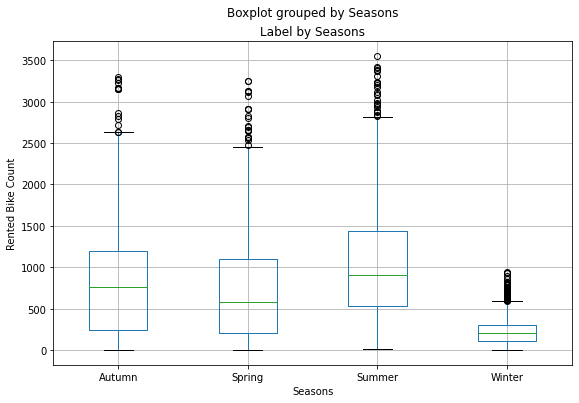

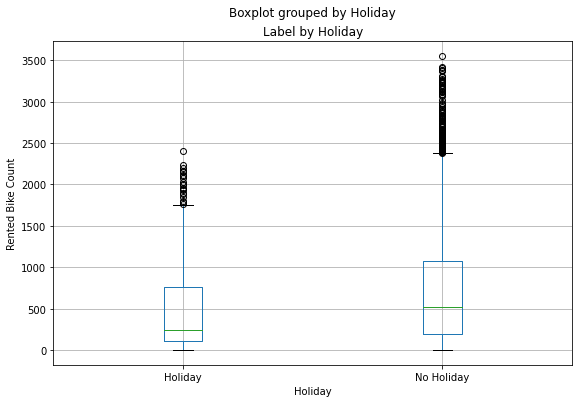

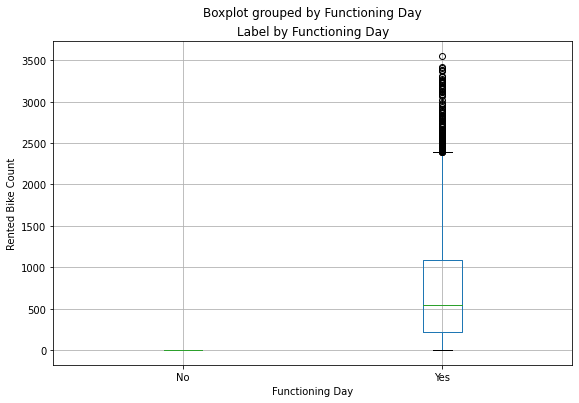

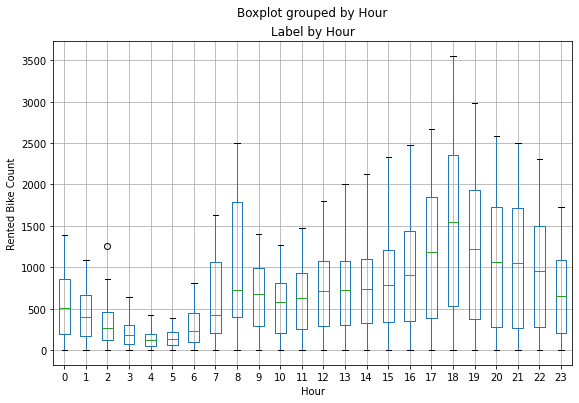

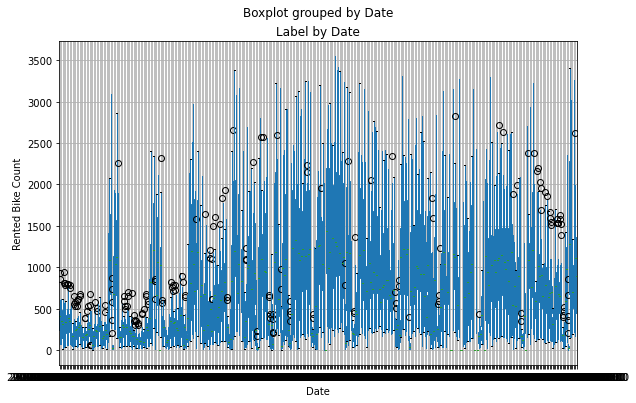

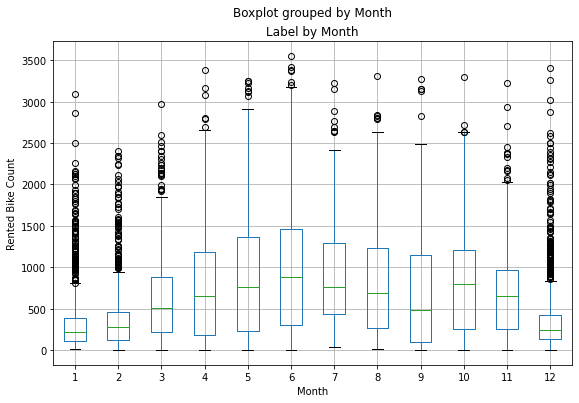

In [ ]:
#plot the boxplot for bike rent count v/s each of the categorical features to observe the variation of count for each type of the feature values. 
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()



---



---



#**3. Data Preparation**

**Feature Selection:** Multicollinearity Test





Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. 

* VIF is always greater or equal to 1.
* If VIF = 1 => Not correlated to any of the variables.
* If 1 < VIF < 5 => Moderately correlated.
* VIF > 5 => Highly correlated.
* If there are multiple variables with VIF greater than 5, only remove one of them and repeat the process.

In [ ]:
# function to calculate Multicollinearity 
def calculate_vif(X):
    #Calculating VIF for the column X 
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
# Get numerical data and calculate VIF for them except for the target variable.
num_cols = data._get_numeric_data().columns.to_list()
num_cols.remove('Rented Bike Count')

#The independent columns to be tested for multicolinearity.
independent_numerical_cols= num_cols
independent_numerical_cols


['Temperature',
 'Humidity',
 'Wind Speed',
 'Visibility',
 'Dew point temperature',
 'Solar radiation',
 'Rainfall',
 'Snowfall',
 'year']

In [ ]:
calculate_vif(data[[i for i in independent_numerical_cols]])

variables         VIF
0            Temperature  187.482103
1               Humidity  186.517131
2             Wind Speed    4.533706
3             Visibility   10.235595
4  Dew point temperature  126.711067
5        Solar radiation    2.832598
6               Rainfall    1.100442
7               Snowfall    1.125229
8                   year  394.869086

In [ ]:
# "Year" has the highest VIF value, therefore, drop the feature and calculate VIF for the rest.
data.drop('year',inplace=True,axis=1)
calculate_vif(data[[i for i in independent_numerical_cols if  i not in ['year']]])


variables        VIF
0            Temperature  29.075866
1               Humidity   5.069743
2             Wind Speed   4.517664
3             Visibility   9.051931
4  Dew point temperature  15.201989
5        Solar radiation   2.821604
6               Rainfall   1.079919
7               Snowfall   1.118903

Observation:
* 'Temperature' cannot be dropped, because it has high correlation with the target variable - Bike rental count.
* Drop 'Dew point temperature' 

In [ ]:
# droping 'dew point temperature' since it has high VIF and also correlated with temperature (Multicolinearity).
data.drop('Dew point temperature',inplace=True,axis=1)
calculate_vif(data[[i for i in independent_numerical_cols if  i not in ['Dew point temperature','year']]])


variables       VIF
0      Temperature  3.166007
1         Humidity  4.758651
2       Wind Speed  4.079926
3       Visibility  4.409448
4  Solar radiation  2.246238
5         Rainfall  1.078501
6         Snowfall  1.118901

* All the features have VIF < 5. Therefore, the above 7 features are considered for modelling.

**Data Modelling**

In [ ]:
#drop 'date' feature : It is not used in further analysis.
data=data.drop(['Date'],axis=1)
data

Rented Bike Count Hour  Temperature  Humidity  Wind Speed  Visibility  \
0                   254    0         -5.2      37.0         2.2      2000.0   
1                   204    1         -5.5      38.0         0.8      2000.0   
2                   173    2         -6.0      39.0         1.0      2000.0   
3                   107    3         -6.2      40.0         0.9      2000.0   
4                    78    4         -6.0      36.0         2.3      2000.0   
...                 ...  ...          ...       ...         ...         ...   
8755               1003   19          4.2      34.0         2.6      1894.0   
8756                764   20          3.4      37.0         2.3      2000.0   
8757                694   21          2.6      39.0         0.3      1968.0   
8758                712   22          2.1      41.0         1.0      1859.0   
8759                584   23          1.9      43.0         1.3      1909.0   

      Solar radiation  Rainfall  Snowfall Seasons     Holiday Functioning Day  \
0                 0.0       0.0       0.0  Winter  No Holiday             Yes   
1                 0.0       0.0       0.0  Winter  No Holiday             Yes   
2                 0.0       0.0       0.0  Winter  No Holiday             Yes   
3                 0.0       0.0       0.0  Winter  No Holiday             Yes   
4                 0.0       0.0       0.0  Winter  No Holiday             Yes   
...               ...       ...       ...     ...         ...             ...   
8755              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8756              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8757              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8758              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8759              0.0       0.0       0.0  Autumn  No Holiday             Yes   

     Month  
0        1  
1        1  
2        1  
3        1  
4        1  
...    ...  
8755    11  
8756    11  
8757    11  
8758    11  
8759    11  

[8760 rows x 13 columns]

In [ ]:
#get the categorical columns for one hot encoding.
categorical_cols=list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_cols

['Seasons', 'Holiday', 'Month', 'Functioning Day', 'Hour']

In [ ]:
data_new = data
# define function for one-hot encoding and apply on categorical columns.

def one_hot_encoding(data, column):
  #Obtains the one hot encoding of the feature provided in argument and returns the dataframe with one hot encoded columns.
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_cols:
    data_new = one_hot_encoding(data_new, col)
data_new.head()

Rented Bike Count  Temperature  Humidity  Wind Speed  Visibility  \
0                254         -5.2      37.0         2.2      2000.0   
1                204         -5.5      38.0         0.8      2000.0   
2                173         -6.0      39.0         1.0      2000.0   
3                107         -6.2      40.0         0.9      2000.0   
4                 78         -6.0      36.0         2.3      2000.0   

   Solar radiation  Rainfall  Snowfall  Seasons_Autumn  Seasons_Spring  \
0              0.0       0.0       0.0               0               0   
1              0.0       0.0       0.0               0               0   
2              0.0       0.0       0.0               0               0   
3              0.0       0.0       0.0               0               0   
4              0.0       0.0       0.0               0               0   

   Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0               0               1                0                   1   
1               0               1                0                   1   
2               0               1                0                   1   
3               0               1                0                   1   
4               0               1                0                   1   

   Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  \
0        1        0        0        0        0        0        0        0   
1        1        0        0        0        0        0        0        0   
2        1        0        0        0        0        0        0        0   
3        1        0        0        0        0        0        0        0   
4        1        0        0        0        0        0        0        0   

   Month_9  Month_10  Month_11  Month_12  Functioning Day_No  \
0        0         0         0         0                   0   
1        0         0         0         0                   0   
2        0         0         0         0                   0   
3        0         0         0         0                   0   
4        0         0         0         0                   0   

   Functioning Day_Yes  Hour_0  Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  \
0                    1       1       0       0       0       0       0   
1                    1       0       1       0       0       0       0   
2                    1       0       0       1       0       0       0   
3                    1       0       0       0       1       0       0   
4                    1       0       0       0       0       1       0   

   Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  Hour_11  Hour_12  Hour_13  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        0        0        0   
2       0       0       0       0        0        0        0        0   
3       0       0       0       0        0        0        0        0   
4       0       0       0       0        0        0        0        0   

   Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Hour_22  Hour_23  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0

In [ ]:
data_new.shape


(8760, 52)

In [ ]:
df=data_new
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   float64
 3   Wind Speed           8760 non-null   float64
 4   Visibility           8760 non-null   float64
 5   Solar radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Seasons_Autumn       8760 non-null   uint8  
 9   Seasons_Spring       8760 non-null   uint8  
 10  Seasons_Summer       8760 non-null   uint8  
 11  Seasons_Winter       8760 non-null   uint8  
 12  Holiday_Holiday      8760 non-null   uint8  
 13  Holiday_No Holiday   8760 non-null   uint8  
 14  Month_1              8760 non-null   uint8  
 15  Month_2              8760 non-null   u

**After feature engineering, there are 51 total features and 8760 observations.**

**Feature Scaling**

In [ ]:
# Assign X: variable(Independent Variables) and Y-Variable(Dependent Variable)

X= df.drop('Rented Bike Count',axis=1)
y= np.sqrt(df['Rented Bike Count']) # consider target variable after square root transformation


In [ ]:
X.shape

(8760, 51)

In [ ]:
X.head()

Temperature  Humidity  Wind Speed  Visibility  Solar radiation  Rainfall  \
0         -5.2      37.0         2.2      2000.0              0.0       0.0   
1         -5.5      38.0         0.8      2000.0              0.0       0.0   
2         -6.0      39.0         1.0      2000.0              0.0       0.0   
3         -6.2      40.0         0.9      2000.0              0.0       0.0   
4         -6.0      36.0         2.3      2000.0              0.0       0.0   

   Snowfall  Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0       0.0               0               0               0               1   
1       0.0               0               0               0               1   
2       0.0               0               0               0               1   
3       0.0               0               0               0               1   
4       0.0               0               0               0               1   

   Holiday_Holiday  Holiday_No Holiday  Month_1  Month_2  Month_3  Month_4  \
0                0                   1        1        0        0        0   
1                0                   1        1        0        0        0   
2                0                   1        1        0        0        0   
3                0                   1        1        0        0        0   
4                0                   1        1        0        0        0   

   Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
0        0        0        0        0        0         0         0         0   
1        0        0        0        0        0         0         0         0   
2        0        0        0        0        0         0         0         0   
3        0        0        0        0        0         0         0         0   
4        0        0        0        0        0         0         0         0   

   Functioning Day_No  Functioning Day_Yes  Hour_0  Hour_1  Hour_2  Hour_3  \
0                   0                    1       1       0       0       0   
1                   0                    1       0       1       0       0   
2                   0                    1       0       0       1       0   
3                   0                    1       0       0       0       1   
4                   0                    1       0       0       0       0   

   Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  Hour_11  Hour_12  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       1       0       0       0       0       0        0        0        0   

   Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Hour_21  Hour_22  Hour_23  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0

**Data Splitting**

In [ ]:
# Split data into train and test with ratio 75:25.
# make use of random state to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle= True)


In [ ]:
#Cols is the list of numerical independent columns that are to be scaled.
cols=data._get_numeric_data().columns.to_list()
cols.remove('Rented Bike Count')
cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Visibility',
 'Solar radiation',
 'Rainfall',
 'Snowfall']

In [ ]:
# Transforming data 
# Robust scaler to handle the outliers in the independent variables.
scaler = RobustScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

# Minmax scaler to normalize the numerical data.
min_max_scaler = MinMaxScaler()
X_train[cols] = min_max_scaler.fit_transform(X_train[cols])
X_test[cols] = min_max_scaler.transform(X_test[cols])



* Independent features are scaled using Robust Scaler and then subjected to Minmax scaler.
* Robust Scaler is not sensitive to the outliers in the data 

In [ ]:
X_train.head()

Temperature  Humidity  Wind Speed  Visibility  Solar radiation  \
2223     0.590909  0.142857    0.297297    0.912557         0.661932   
798      0.194056  0.489796    0.324324    0.995425         0.000000   
7752     0.508741  0.724490    0.162162    0.998475         0.000000   
734      0.363636  0.285714    0.513514    0.977631         0.312500   
2881     0.512238  0.785714    0.270270    0.284698         0.000000   

      Rainfall  Snowfall  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
2223       0.0       0.0               0               1               0   
798        0.0       0.0               0               0               0   
7752       0.0       0.0               1               0               0   
734        0.0       0.0               0               0               0   
2881       0.0       0.0               0               1               0   

      Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Month_1  Month_2  \
2223               0                0                   1        0        0   
798                1                0                   1        0        0   
7752               0                0                   1        0        0   
734                1                1                   0        0        0   
2881               0                0                   1        0        0   

      Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
2223        1        0        0        0        0        0        0         0   
798         1        0        0        0        0        0        0         0   
7752        0        0        0        0        0        0        0         1   
734         0        0        0        0        0        0        0         0   
2881        1        0        0        0        0        0        0         0   

      Month_11  Month_12  Functioning Day_No  Functioning Day_Yes  Hour_0  \
2223         0         0                   0                    1       0   
798          0         0                   0                    1       0   
7752         0         0                   0                    1       1   
734          0         1                   0                    1       0   
2881         0         0                   0                    1       0   

      Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  \
2223       0       0       0       0       0       0       0       0       0   
798        0       0       0       0       0       1       0       0       0   
7752       0       0       0       0       0       0       0       0       0   
734        0       0       0       0       0       0       0       0       0   
2881       1       0       0       0       0       0       0       0       0   

      Hour_10  Hour_11  Hour_12  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
2223        0        0        0        0        0        1        0        0   
798         0        0        0        0        0        0        0        0   
7752        0        0        0        0        0        0        0        0   
734         0        0        0        0        1        0        0        0   
2881        0        0        0        0        0        0        0        0   

      Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
2223        0        0        0        0        0        0  
798         0        0        0        0        0        0  
7752        0        0        0        0        0        0  
734         0        0        0        0        0        0  
2881        0        0        0        0        0        0

In [ ]:
# Checking shape of the train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6570, 51)
(6570,)
(2190, 51)
(2190,)


* Train dataset: 6560 observations and 51 features.
* Test dataset: 2190 observations and 51 features.

Checking the distribution of train and test dataset.

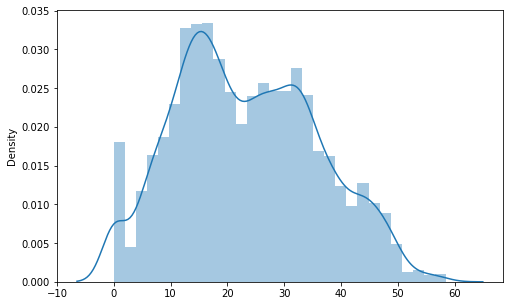

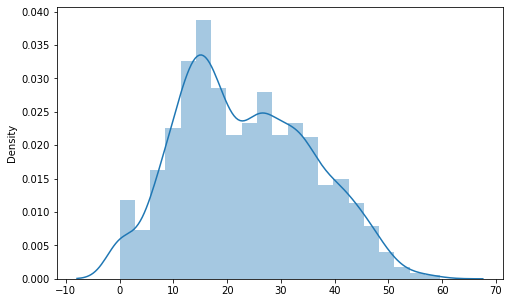

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(x=y_train)
plt.figure(figsize=(8,5))
sns.distplot(x=y_test)

* Train and test data have almost same distribution.

#**4. Modeling** 

# **1. Linear Regression**

In [ ]:
# Take instance
l_reg=LinearRegression()
# fit the model and train
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# get dataframe for x columns and respective coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

Coefficient
Temperature          2.632087e+01
Humidity            -1.302862e+01
Wind Speed          -1.074110e+00
Visibility           8.187670e-01
Solar radiation      3.615577e+00
Rainfall            -4.665712e+01
Snowfall            -1.981409e-01
Seasons_Autumn      -3.131222e+12
Seasons_Spring      -3.131222e+12
Seasons_Summer      -3.131222e+12
Seasons_Winter      -3.131222e+12
Holiday_Holiday      4.459165e+12
Holiday_No Holiday   4.459165e+12
Month_1              6.393714e+12
Month_2              6.393714e+12
Month_3              6.393714e+12
Month_4              6.393714e+12
Month_5              6.393714e+12
Month_6              6.393714e+12
Month_7              6.393714e+12
Month_8              6.393714e+12
Month_9              6.393714e+12
Month_10             6.393714e+12
Month_11             6.393714e+12
Month_12             6.393714e+12
Functioning Day_No   5.182990e+12
Functioning Day_Yes  5.182990e+12
Hour_0              -2.557083e+12
Hour_1              -2.557083e+12
Hour_2              -2.557083e+12
Hour_3              -2.557083e+12
Hour_4              -2.557083e+12
Hour_5              -2.557083e+12
Hour_6              -2.557083e+12
Hour_7              -2.557083e+12
Hour_8              -2.557083e+12
Hour_9              -2.557083e+12
Hour_10             -2.557083e+12
Hour_11             -2.557083e+12
Hour_12             -2.557083e+12
Hour_13             -2.557083e+12
Hour_14             -2.557083e+12
Hour_15             -2.557083e+12
Hour_16             -2.557083e+12
Hour_17             -2.557083e+12
Hour_18             -2.557083e+12
Hour_19             -2.557083e+12
Hour_20             -2.557083e+12
Hour_21             -2.557083e+12
Hour_22             -2.557083e+12
Hour_23             -2.557083e+12

In [ ]:
# Check intercept
l_reg.intercept_

-10347563740844.363

In [ ]:
# Functions used for evaluation and visualization 

# Plot the regression coefficients
def plot_coefficients(X, coef_):
  plt.figure(figsize=(15,6))
  plt.plot(range(len(X.columns)), coef_)
  plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
  plt.margins(0.02)
  plt.savefig('linear coefficients')
  plt.show()

def evaluation(model,y_actual,y_pred):
  
  #Calculate Mean Absolute Error.
  MAE= mean_absolute_error(y_actual,y_pred)
  # print(f"The Mean Absolute Error (MAE) is {MAE}.")

  #Calculate  Mean Squared Error
  MSE=mean_squared_error(y_actual,y_pred)
  # print(f"The Mean Squred Error(MSE) is {MSE}.")

  #Calculate Root Mean Squared Error
  RMSE=np.sqrt(MSE)
  # print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

  #Calculate R2 Score
  R2=r2_score(y_actual,y_pred)
  print(f"The R2 Score is {R2}.")

  var_test = y_actual.var()
  Adj_rsquare = 1-(MSE/var_test)
  # print(f"The Adjusted R2 Score is {Adj_rsquare}.")

  dictionary={'Model':model,
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2_score': round(Adj_rsquare,4)}
  # create training_result dataframe
  return pd.DataFrame(dictionary,index=[1])

# define a fucntion to visualize predicted y values with actual y values:
def line_plot(y_pred,y_test): 
  # plt.figure(figsize=(12,10))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual Bike Rental Count")
  plt.show()

def scatter_plot(y_pred,y_test): 
  print("The scatter plot shows the deviation of actual data points from the best fit line")
  plt.figure(figsize=(8,5))
  sns.regplot(x=y_test,y=y_pred,line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted Bike Rental Count")

def residual_plot(y_pred,y_test):

  print("1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not")
  print("2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.")
  print("   If yes, the plot would show a fairly straight line.")
  print("3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.")
  print("   It means that the model doesn’t capture non-linear effects.")
  print("   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.")
  print("   Ideally there shouldn’t be any clear patterns.")

  plt.figure(figsize=(8,5))
  sns.distplot(x=y_test-y_pred)
  plt.title("Residual Density Plot")


  fig, ax = plt.subplots(figsize=(8, 5))
  residual=y_pred-y_test
  pp = sm.ProbPlot(residual, fit=True)
  qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='k', alpha=0.5, ax=ax)
  sm.qqline(qq.axes[0], line='45', fmt='k--')
  plt.title("Q-Q plot")

  
  plt.figure(figsize=(8,5))
  sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
  plt.ylabel('Residuals')
  plt.xlabel('y_predicted')
  plt.title("Residual Plot")


  



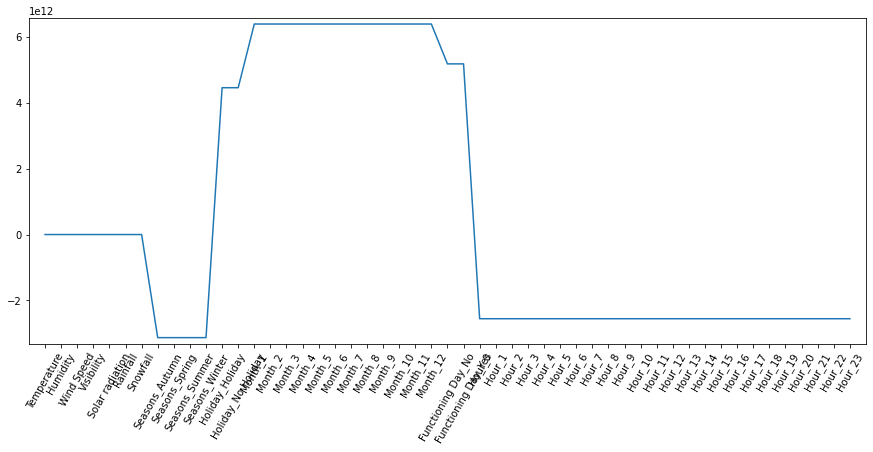

In [ ]:
plot_coefficients(X,l_reg.coef_)

**Observation**:
* We see that few features have high coefficients value compared to that of others, wherein a small change in these variables bring extreme change in the target variable.
* Linear model has large estimated coefficients. The larger the absolute value of the coefficient, the more power it has to change the predicted response, resulting in a higher variance.

In [ ]:
#Checking score
l_reg.score(X_train,y_train)


0.7626385881123962

In [ ]:
# Check score on test dataset
l_reg.score(X_test,y_test)

0.740763323067954

In [ ]:
# prediction on train data
y_pred_train=l_reg.predict(X_train)

# prediction on test data
y_pred=l_reg.predict(X_test)

In [ ]:
# Evaluation of training data set
evaluation("Linear Regression-train",y_train,y_pred_train)

The R2 Score is 0.7626385881123962.


Model     MAE      MSE    RMSE  R2_score  \
1  Linear Regression-train  4.6532  37.0831  6.0896    0.7626   

   Adjusted R2_score  
1             0.7627

In [ ]:
# Evaluation of training data set
evaluation("Linear Regression-test",y_test,y_pred)

The R2 Score is 0.740763323067954.


Model     MAE      MSE    RMSE  R2_score  \
1  Linear Regression-test  4.6494  39.2343  6.2637    0.7408   

   Adjusted R2_score  
1             0.7409

Observation:
* Difference in Adjusted R2 score for train and test data is less.
* Overfitting can be observed due to large value of estimated co-efficients as seen in the co-efficients plot.
* Model performance needs to be improvised.


Evaluation Plots 

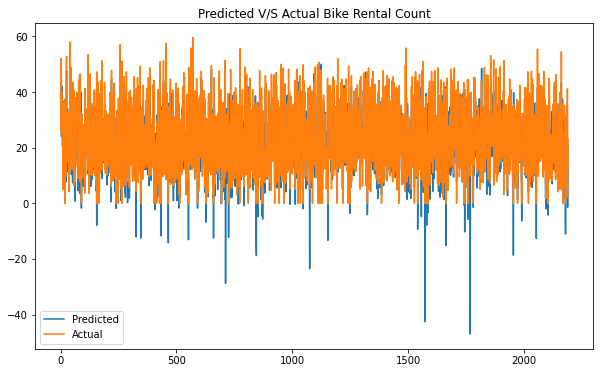

In [ ]:
line_plot(y_pred,y_test)


The scatter plot shows the deviation of actual data points from the best fit line


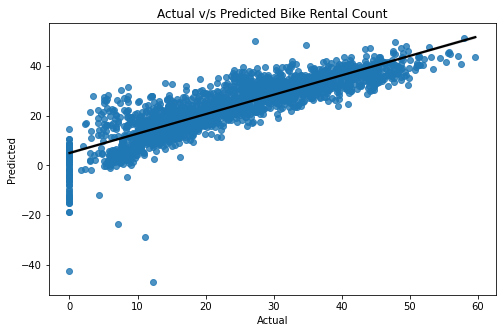

In [ ]:
scatter_plot(y_pred,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


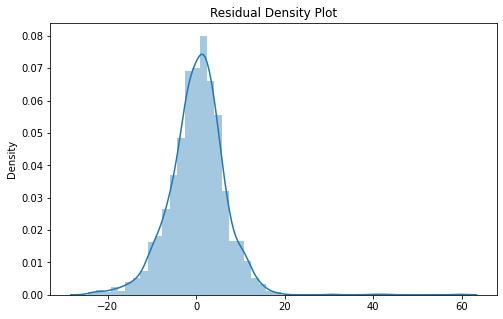

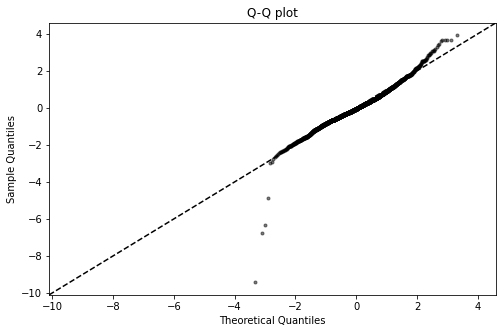

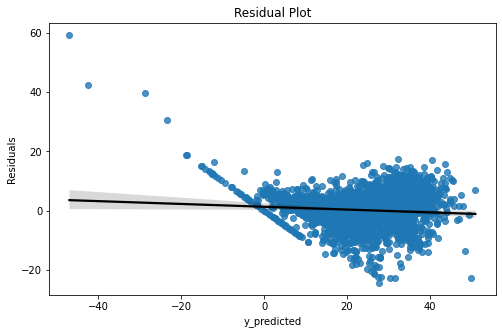

In [ ]:
# Residuals of the regression should be normally distributed.
# Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 

residual_plot(y_pred,y_test)


* The density ditribution of residuals show that the error terms are normally distributed.
* It can also be validated from the Q-Q plot that, the distribution is normal.
* The cluster of points is wider as the values for the predicted dependent varirable get larger, hence indicating **Heteroscedasticity**.

#**Model 2: Regularized Regression**

* Lasso Regression (L1 Regularization)
* Ridge Regression (L2 Regularization) 
* Elastic Net Regression 

**Lasso Regression**

In [ ]:
# finding the best parameters for lasso by gridsearchcv
lasso_reg=Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0015]}
lasso_grid = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=5)


In [ ]:
lasso_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0015]},
             scoring='neg_mean_squared_error')

In [ ]:
# the best parameters
print("Tuned lasso Parameters: {}".format(lasso_grid.best_params_))
print("Best score is {}".format(lasso_grid.best_score_))

Tuned lasso Parameters: {'alpha': 0.0015}
Best score is -37.79525874860856


In [ ]:
best_lasso_model = lasso_grid.best_estimator_
best_lasso_model.coef_ 


array([ 2.61966492e+01, -1.31083946e+01, -9.30719525e-01,  8.06752889e-01,
        3.39116111e+00, -4.58150652e+01, -0.00000000e+00,  3.25563327e+00,
        2.64227494e-01, -0.00000000e+00, -3.81341529e+00, -2.64842841e+00,
        1.59595526e-13, -1.89632026e-01, -9.54066330e-01,  2.51091959e-03,
       -1.13725894e-01,  1.20649573e+00,  3.95832773e+00, -3.13772261e-01,
       -8.94724934e-01, -6.28534195e-02,  1.86033300e+00,  5.55760576e-01,
        9.17536401e-01, -2.87034873e+01,  1.40977404e-12,  0.00000000e+00,
       -1.76197270e+00, -4.79065284e+00, -7.22295027e+00, -9.47852113e+00,
       -9.17909180e+00, -4.46584443e+00,  1.81904441e+00,  7.18064129e+00,
        1.20303807e+00, -3.08225257e+00, -3.29216955e+00, -2.54536051e+00,
       -2.65159265e+00, -2.69448049e+00, -1.60298399e+00,  3.11942476e-01,
        4.41752934e+00,  1.02907589e+01,  7.31881084e+00,  6.79854202e+00,
        6.55714515e+00,  5.39508877e+00,  1.78356903e+00])

In [ ]:
# get dataframe of x columns and Coeficients

pd.DataFrame(best_lasso_model.coef_,X.columns, columns=['Coefficient'])

Coefficient
Temperature          2.619665e+01
Humidity            -1.310839e+01
Wind Speed          -9.307195e-01
Visibility           8.067529e-01
Solar radiation      3.391161e+00
Rainfall            -4.581507e+01
Snowfall            -0.000000e+00
Seasons_Autumn       3.255633e+00
Seasons_Spring       2.642275e-01
Seasons_Summer      -0.000000e+00
Seasons_Winter      -3.813415e+00
Holiday_Holiday     -2.648428e+00
Holiday_No Holiday   1.595955e-13
Month_1             -1.896320e-01
Month_2             -9.540663e-01
Month_3              2.510920e-03
Month_4             -1.137259e-01
Month_5              1.206496e+00
Month_6              3.958328e+00
Month_7             -3.137723e-01
Month_8             -8.947249e-01
Month_9             -6.285342e-02
Month_10             1.860333e+00
Month_11             5.557606e-01
Month_12             9.175364e-01
Functioning Day_No  -2.870349e+01
Functioning Day_Yes  1.409774e-12
Hour_0               0.000000e+00
Hour_1              -1.761973e+00
Hour_2              -4.790653e+00
Hour_3              -7.222950e+00
Hour_4              -9.478521e+00
Hour_5              -9.179092e+00
Hour_6              -4.465844e+00
Hour_7               1.819044e+00
Hour_8               7.180641e+00
Hour_9               1.203038e+00
Hour_10             -3.082253e+00
Hour_11             -3.292170e+00
Hour_12             -2.545361e+00
Hour_13             -2.651593e+00
Hour_14             -2.694480e+00
Hour_15             -1.602984e+00
Hour_16              3.119425e-01
Hour_17              4.417529e+00
Hour_18              1.029076e+01
Hour_19              7.318811e+00
Hour_20              6.798542e+00
Hour_21              6.557145e+00
Hour_22              5.395089e+00
Hour_23              1.783569e+00

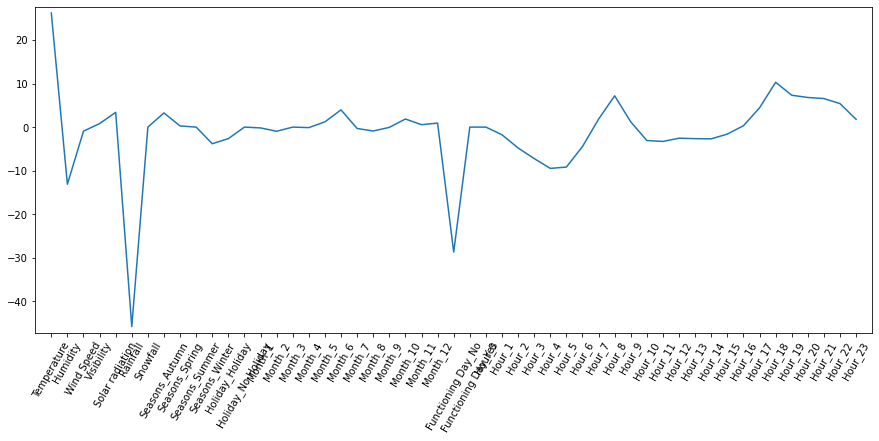

In [ ]:
plot_coefficients(X,best_lasso_model.coef_)

**Observation:**

* According to the coefficients of Lasso Regression model, the features namely, humidity, rainfall, functioning day_no have a negative relation on the dependent variable, indicating that high rainfall, high humidity and non-functioning hours are mostly not favorable for bike rents. 
* Whereas, the features namely hour_8 and hour_18 have high positive relation on dependent variable, indicating that the peak hours demand high number of bike rents.

In [ ]:
# Check score on train dataset
best_lasso_model.score(X_train,y_train)

0.7626107274299467

In [ ]:
# Check score on test dataset
best_lasso_model.score(X_test,y_test)

0.7416654131860254

In [ ]:
# Check intercept
best_lasso_model.intercept_

17.154052207738207

In [ ]:
# prediction on train data
y_pred_train_lasso=best_lasso_model.predict(X_train)
# prediction on test data
y_pred_lasso=best_lasso_model.predict(X_test)

In [ ]:
#evaluation on train data
evaluation("Lasso Regression-train",y_train,y_pred_train_lasso)

The R2 Score is 0.7626107274299467.


Model     MAE      MSE    RMSE  R2_score  \
1  Lasso Regression-train  4.6538  37.0875  6.0899    0.7626   

   Adjusted R2_score  
1             0.7626

In [ ]:
#evaluation on test data
evaluation("Lasso Regression-test",y_test,y_pred_lasso)

The R2 Score is 0.7416654131860254.


Model     MAE      MSE    RMSE  R2_score  Adjusted R2_score
1  Lasso Regression-test  4.6477  39.0978  6.2528    0.7417             0.7418

Observation:

* The coefficients have been smoothened.
* No visible improvements in the predictions are observed in the regularized- lasso model.


Evaluation Plots

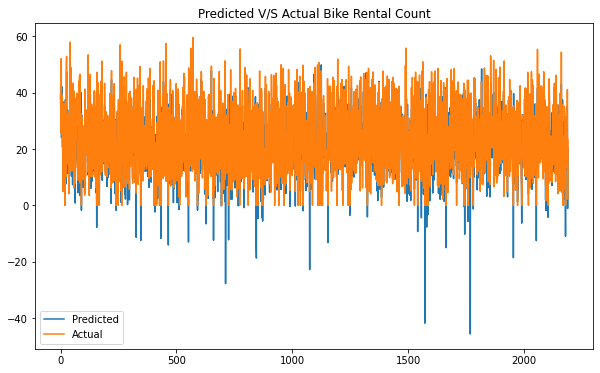

In [ ]:
line_plot(y_pred_lasso,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


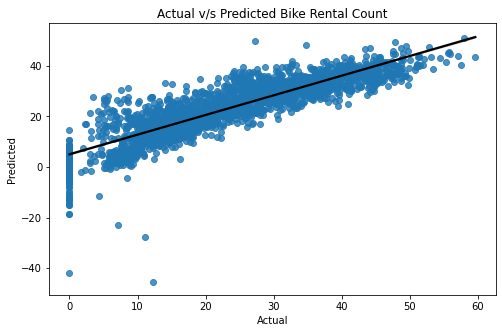

In [ ]:
scatter_plot(y_pred_lasso,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


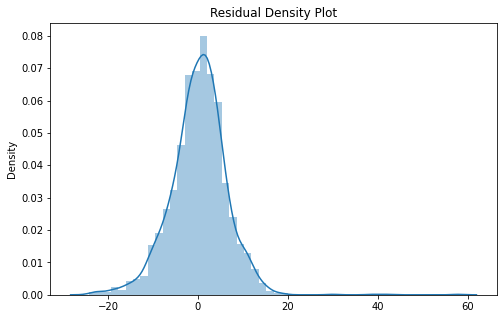

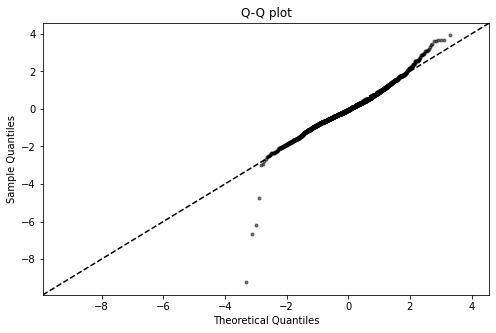

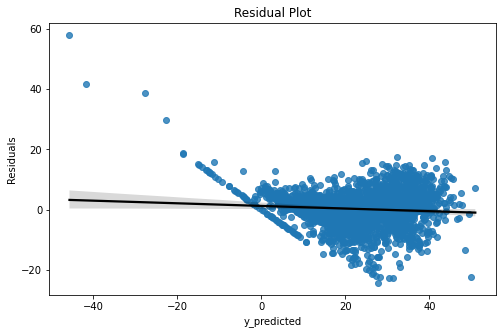

In [ ]:
residual_plot(y_pred_lasso,y_test)

* The density ditribution of residuals show that the error terms are normally distributed.
* It can also be validated from the Q-Q plot that, the distribution is normal.
* The cluster of points is wider as the values for the predicted dependent varirable get larger, hence indicating **Heteroscedasticity**.

**Ridge Regression**

In [ ]:
# instantiating ridge regerssion
ridge_lg=Ridge()


In [ ]:
# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge_lg, parameters, scoring='neg_mean_squared_error', cv=3)

In [ ]:
# fitting and training
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [ ]:
best_ridge_model = ridge_grid.best_estimator_
best_ridge_model.coef_ 


array([ 2.63217404e+01, -1.30315935e+01, -1.08356448e+00,  8.23899377e-01,
        3.61600403e+00, -4.66098590e+01, -1.90114266e-01,  3.32500810e+00,
        3.38358761e-01,  2.02817698e-02, -3.68364863e+00, -1.34210954e+00,
        1.34210954e+00, -6.94876238e-01, -1.47593289e+00, -4.76552980e-01,
       -6.40013373e-01,  7.09983089e-01,  3.49164603e+00, -8.47671736e-01,
       -1.40201249e+00, -5.86009720e-01,  1.37758462e+00,  9.79922481e-02,
        4.45863439e-01, -1.43763511e+01,  1.43763511e+01,  5.26150474e-02,
       -1.78770126e+00, -4.81770195e+00, -7.24516895e+00, -9.50259815e+00,
       -9.20675338e+00, -4.49199761e+00,  1.86303892e+00,  7.21046638e+00,
        1.21459154e+00, -3.16932073e+00, -3.39454268e+00, -2.66112891e+00,
       -2.77090855e+00, -2.81090131e+00, -1.70259381e+00,  3.03758410e-01,
        4.43820911e+00,  1.03381001e+01,  7.37313825e+00,  6.86488430e+00,
        6.61782293e+00,  5.44880463e+00,  1.83588765e+00])

In [ ]:
best_ridge_model

Ridge(alpha=0.01)

In [ ]:
# Get the best parameters.

print("Tuned ridge Parameters: {}".format(ridge_grid.best_params_))
print("Best score is {}".format(ridge_grid.best_score_))

Tuned ridge Parameters: {'alpha': 0.01}
Best score is -38.06781294392345


In [ ]:
# get dataframe for x columns and coeff
pd.DataFrame(best_ridge_model.coef_,X.columns,columns=['Coefficients'])

Coefficients
Temperature             26.321740
Humidity               -13.031594
Wind Speed              -1.083564
Visibility               0.823899
Solar radiation          3.616004
Rainfall               -46.609859
Snowfall                -0.190114
Seasons_Autumn           3.325008
Seasons_Spring           0.338359
Seasons_Summer           0.020282
Seasons_Winter          -3.683649
Holiday_Holiday         -1.342110
Holiday_No Holiday       1.342110
Month_1                 -0.694876
Month_2                 -1.475933
Month_3                 -0.476553
Month_4                 -0.640013
Month_5                  0.709983
Month_6                  3.491646
Month_7                 -0.847672
Month_8                 -1.402012
Month_9                 -0.586010
Month_10                 1.377585
Month_11                 0.097992
Month_12                 0.445863
Functioning Day_No     -14.376351
Functioning Day_Yes     14.376351
Hour_0                   0.052615
Hour_1                  -1.787701
Hour_2                  -4.817702
Hour_3                  -7.245169
Hour_4                  -9.502598
Hour_5                  -9.206753
Hour_6                  -4.491998
Hour_7                   1.863039
Hour_8                   7.210466
Hour_9                   1.214592
Hour_10                 -3.169321
Hour_11                 -3.394543
Hour_12                 -2.661129
Hour_13                 -2.770909
Hour_14                 -2.810901
Hour_15                 -1.702594
Hour_16                  0.303758
Hour_17                  4.438209
Hour_18                 10.338100
Hour_19                  7.373138
Hour_20                  6.864884
Hour_21                  6.617823
Hour_22                  5.448805
Hour_23                  1.835888

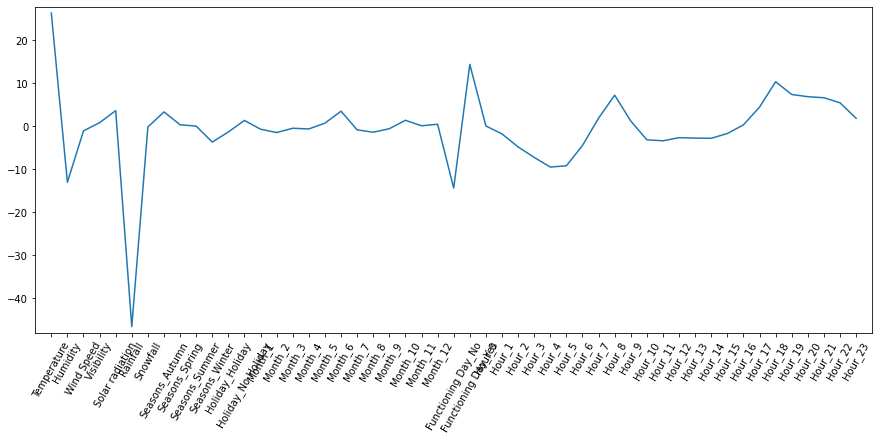

In [ ]:

plot_coefficients(X,best_ridge_model.coef_)

Observation:

* According to the co-efficients of Ridge Regression model, the features namely, humidity, rainfall, functioning day_no have negative relation with the dependent variable, indicating that high rainfall, high humidity and non-functioning hours are mostly not favourable for bike rents. 
* Whereas, the features namely hour_8, hour_18, functional day_yes have high positive relation with the dependent variable, indicating that the peak hours and functioning hours demand high number of bike rents.

In [ ]:
# Check intercept
best_ridge_model.intercept_

1.7572209613044265

In [ ]:
# prediction on training dataset
y_pred_train_ridge=best_ridge_model.predict(X_train)
# prediction on test dataset
y_pred_ridge=best_ridge_model.predict(X_test)

In [ ]:
evaluation("Ridge Regression-train",y_train,y_pred_train_ridge)

The R2 Score is 0.762639003382375.


Model     MAE     MSE    RMSE  R2_score  Adjusted R2_score
1  Ridge Regression-train  4.6533  37.083  6.0896    0.7626             0.7627

In [ ]:
evaluation("Ridge Regression-test",y_test,y_pred_ridge)

The R2 Score is 0.7408154307737905.


Model     MAE      MSE    RMSE  R2_score  Adjusted R2_score
1  Ridge Regression-test  4.6493  39.2264  6.2631    0.7408             0.7409

Observation:

* The coefficients have been regularized.
* No visible improvements in the predictions are observed in the regularized- ridge model.

Evaluation Plots

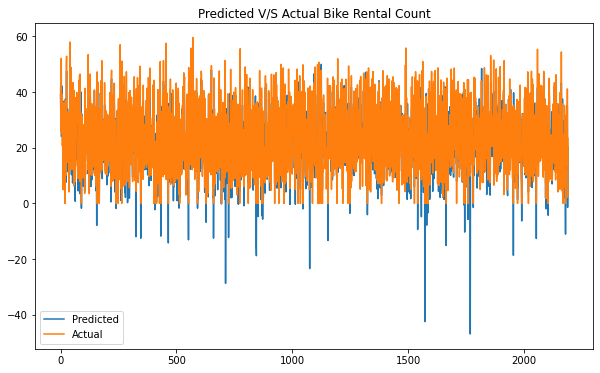

In [ ]:
line_plot(y_pred_ridge,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


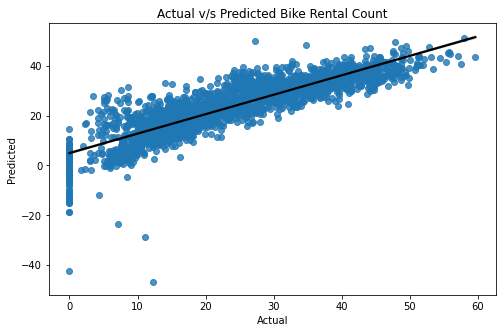

In [ ]:
scatter_plot(y_pred_ridge,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


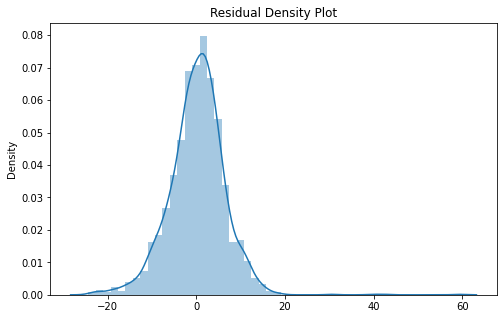

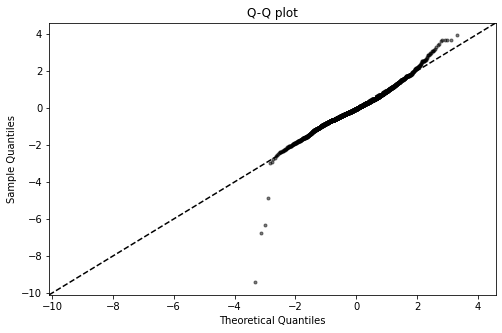

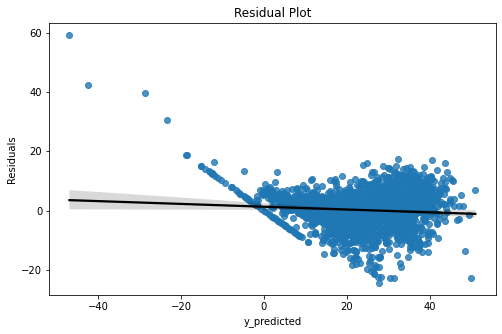

In [ ]:
residual_plot(y_pred_ridge,y_test)

* The density ditribution of residuals show that the error terms are normally distributed.
* It can also be validated from the Q-Q plot that, the distribution is normal.
* The cluster of points is wider as the values for the predicted dependent varirable get larger, hence indicating **Heteroscedasticity**.

**ElasticNet**

In [ ]:
# Cross validation 
elastic_regressor= ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_grid = GridSearchCV(elastic_regressor, parameters, scoring='neg_mean_squared_error',cv=4)
elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
# print best parameters and best score
print(f'The best parameter value is {elastic_grid.best_params_}')
print(f'The best negative mean squred error value is {elastic_grid.best_score_}')


The best parameter value is {'alpha': 0.0001, 'l1_ratio': 0.6}
The best negative mean squred error value is -37.839557613072614


In [ ]:
best_elastic_model = elastic_grid.best_estimator_
best_elastic_model.coef_ 

array([ 26.20266533, -13.061715  ,  -1.08054347,   0.83629641,
         3.64515271, -45.47674625,  -0.16953477,   4.20288145,
         1.2132039 ,   0.92184855,  -2.83255792,  -1.59165407,
         1.08608328,  -0.59576205,  -1.37238441,  -0.37007264,
        -0.5361197 ,   0.81687939,   3.58158248,  -0.7315859 ,
        -1.30232568,  -0.47479326,   1.48039473,   0.19374453,
         0.54612273, -15.67344555,  13.05697272,  -0.050322  ,
        -1.88716333,  -4.91543225,  -7.34526147,  -9.59725391,
        -9.30092686,  -4.5941027 ,   1.75009904,   7.09039376,
         1.09453793,  -3.28130723,  -3.50854876,  -2.77779211,
        -2.88608505,  -2.92100705,  -1.81227646,   0.19424768,
         4.32732641,  10.21441226,   7.26236187,   6.7467639 ,
         6.50370097,   5.3407095 ,   1.73040364])

In [ ]:
best_elastic_model

ElasticNet(alpha=0.0001, l1_ratio=0.6)

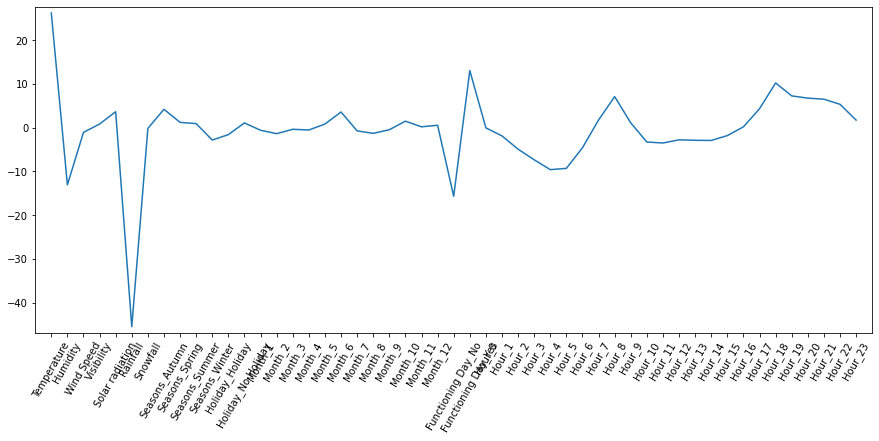

In [ ]:

plot_coefficients(X,best_elastic_model.coef_)

In [ ]:
# Check score on Train dataset
elastic_grid.score(X_train,y_train)

-37.08541294423141

In [ ]:
# check score on Test dataset.
elastic_grid.score(X_test,y_test)

-39.06904900503251

In [ ]:
#  prediction on train dataset
y_pred_train_elastic_grid=elastic_grid.predict(X_train)
#  prediction on test dataset
y_pred_elastic_grid=elastic_grid.predict(X_test)

In [ ]:
evaluation("Elastic Net Regression GridSearch CV-train",y_train,y_pred_train_elastic_grid)

The R2 Score is 0.7626238260874922.


Model     MAE      MSE    RMSE  \
1  Elastic Net Regression GridSearch CV-train  4.6548  37.0854  6.0898   

   R2_score  Adjusted R2_score  
1    0.7626             0.7627

In [ ]:
evaluation("Elastic Net Regression GridSearch CV-test",y_test,y_pred_elastic_grid)

The R2 Score is 0.7418552997784498.


Model     MAE     MSE    RMSE  \
1  Elastic Net Regression GridSearch CV-test  4.6498  39.069  6.2505   

   R2_score  Adjusted R2_score  
1    0.7419              0.742

* No visible improvements in the predictions are observed in the regularized- ElasticNet model.

Evaluation Plots

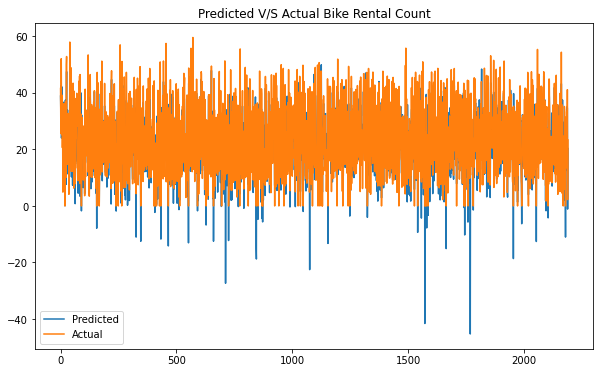

In [ ]:
line_plot(y_pred_elastic_grid,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


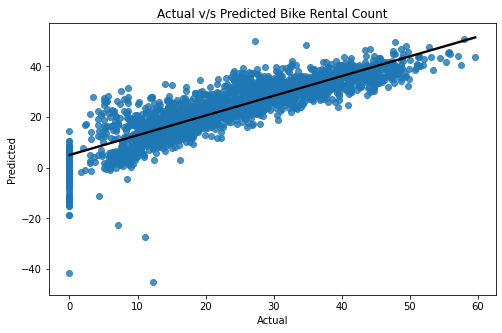

In [ ]:
scatter_plot(y_pred_elastic_grid,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


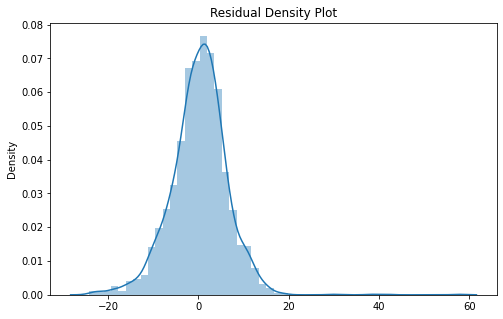

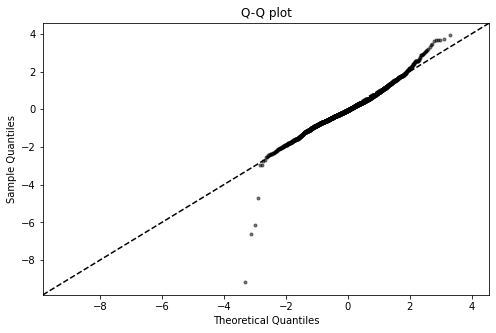

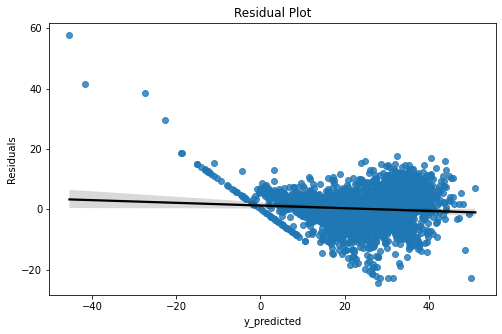

In [ ]:
residual_plot(y_pred_elastic_grid,y_test)

* The density ditribution of residuals show that the error terms are normally distributed.
* It can also be validated from the Q-Q plot that, the distribution is normal.
* The cluster of points is wider as the values for the predicted dependent varirable get larger, hence indicating **Heteroscedasticity**.

#**Model 3: Decision Tree Regressor**

In [ ]:
# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')
# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [ ]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8032444643444457

In [ ]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.7558798151367694

In [ ]:
#  prediction on train dataset
y_pred_train_decision=D_tree.predict(X_train)
#  prediction on test dataset
y_pred_decision=D_tree.predict(X_test)

In [ ]:
evaluation("Decision Tree Regression-train",y_train,y_pred_train_decision)

The R2 Score is 0.8032444643444457.


Model     MAE      MSE    RMSE  R2_score  \
1  Decision Tree Regression-train  3.8867  30.7392  5.5443    0.8032   

   Adjusted R2_score  
1             0.8033

In [ ]:
evaluation("Decision Tree Regression-test",y_test,y_pred_decision)

The R2 Score is 0.7558798151367694.


Model   MAE      MSE    RMSE  R2_score  \
1  Decision Tree Regression-test  4.39  36.9465  6.0784    0.7559   

   Adjusted R2_score  
1              0.756

**Observation:**

* There is improvement in the performance.
* No overfitting observed. 
* Performance needs to be further improvised. 

Evaluation Plots

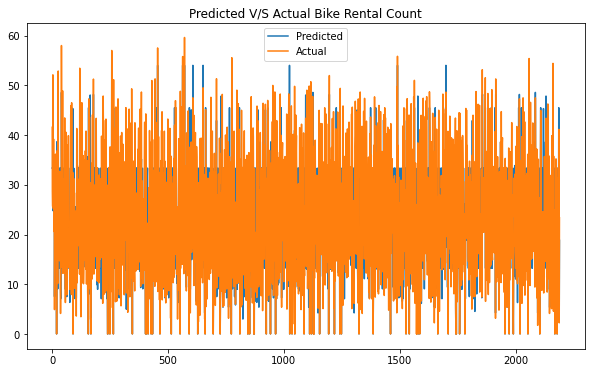

In [ ]:
line_plot(y_pred_decision,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


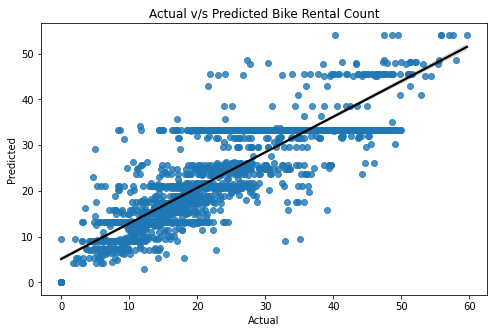

In [ ]:
scatter_plot(y_pred_decision,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


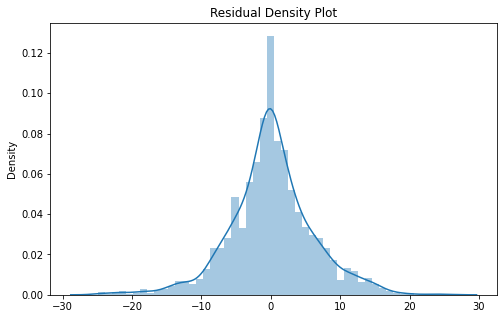

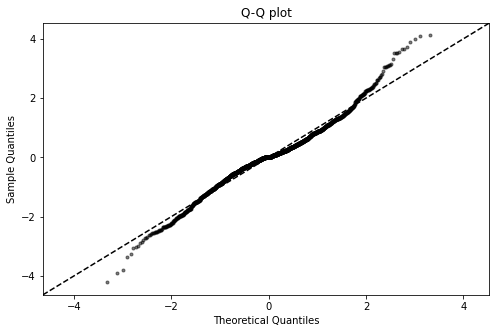

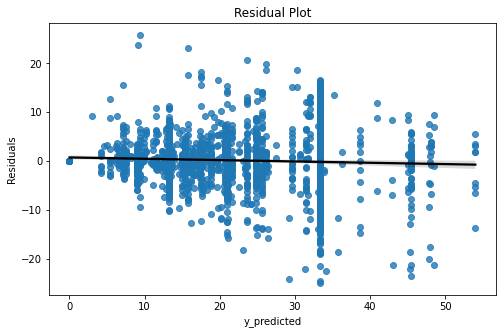

In [ ]:
residual_plot(y_pred_decision,y_test)

Observation:

* Residuals are normally distributed
* There is no significant pattern observed, Heteroscadasticity doesn't exist.

**Decision Tree Regressor: Hyperparameter Tuning**

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
D_tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
D_tree_cv = GridSearchCV(D_tree, param_dist, cv=5)

# Fit it to the data
D_tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(D_tree_cv.best_params_))
print("Best score is {}".format(D_tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 14, 'min_samples_split': 14}
Best score is 0.8110977203534789


In [ ]:
D_tree_cv = DecisionTreeRegressor(max_depth= 14, min_samples_split=14)
D_tree_cv.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=14, min_samples_split=14)

In [ ]:
D_tree_cv.score(X_train,y_train)

0.8856661565667266

In [ ]:
D_tree_cv.score(X_test,y_test)

0.8083847023387614

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train_decision_grid=D_tree_cv.predict(X_train)
#  predicting y_predictions from  X test values
y_pred_decision_grid=D_tree_cv.predict(X_test)

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

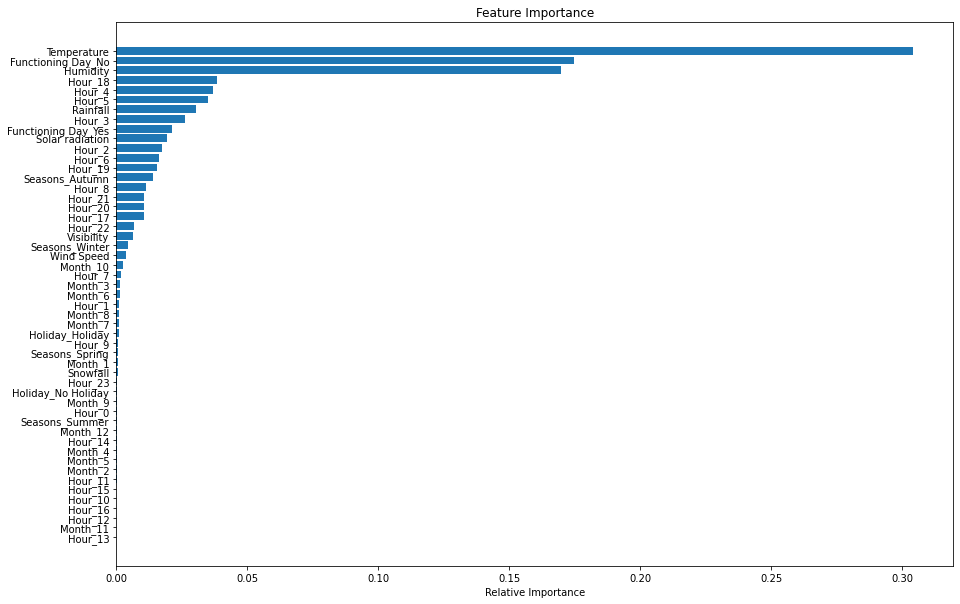

In [ ]:
get_features_importance(D_tree_cv,X_train)

* Most important features in the prediction include:

Temperature, Functioning Day_yes, Humidity, Hour_18, Hour_4, Hour_5, Rainfall and soon.

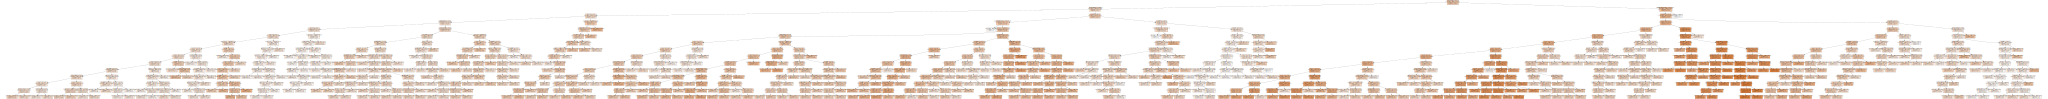

In [ ]:
dot_data = tree.export_graphviz(D_tree_cv, out_file=None, 
                                feature_names=X.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
#evaluation of train dataset
evaluation("Decision Tree GridSearchCV-train",y_train,y_pred_train_decision_grid)

The R2 Score is 0.8856661565667266.


Model     MAE      MSE    RMSE  R2_score  \
1  Decision Tree GridSearchCV-train  2.8382  17.8624  4.2264    0.8857   

   Adjusted R2_score  
1             0.8857

In [ ]:
#evaluation of test dataset
evaluation("Decision Tree GridSearchCV-test",y_test,y_pred_decision_grid)

The R2 Score is 0.8083847023387614.


Model     MAE      MSE    RMSE  R2_score  \
1  Decision Tree GridSearchCV-test  3.7566  29.0001  5.3852    0.8084   

   Adjusted R2_score  
1             0.8085

**Observation:**

* There is improvement in model performace after cross validation. 
* But the cross-validated model is slightly overfit.

Evaluation Plots

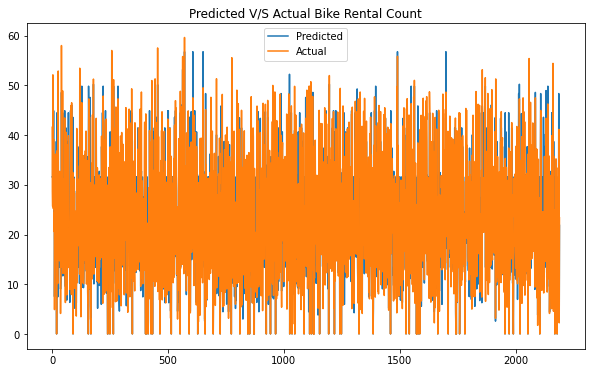

In [ ]:
line_plot(y_pred_decision_grid,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


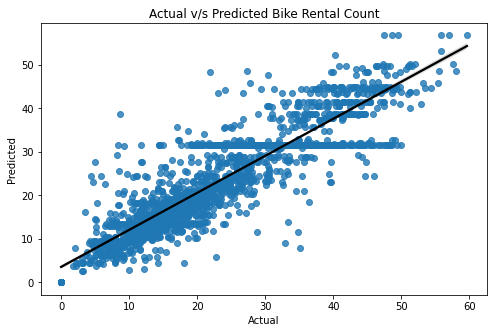

In [ ]:
scatter_plot(y_pred_decision_grid,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


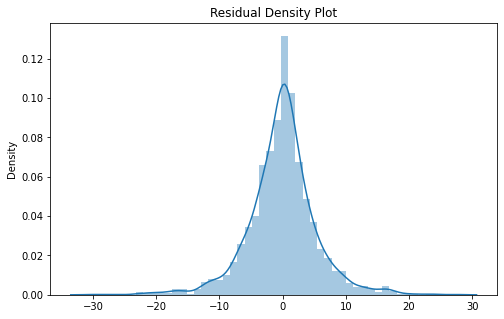

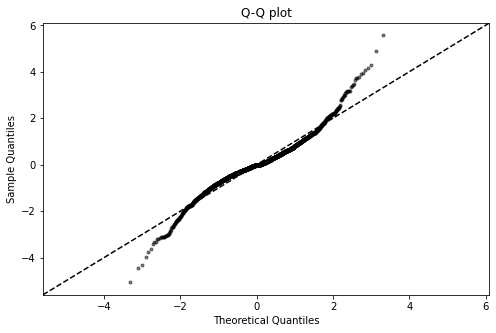

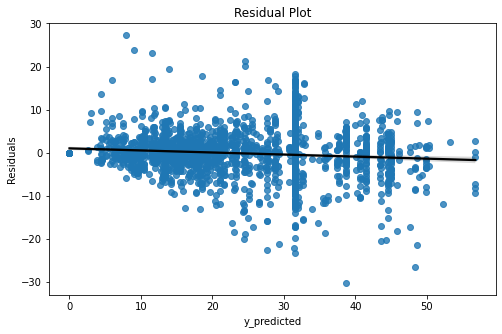

In [ ]:
residual_plot(y_pred_decision_grid,y_test)

* Residuals are normally distributed
* There is no significant pattern observed, Heteroscadasticity doesn't exist.

# **Ensemble Models:**


#**Model 4: Bagging [Random Forest Regressor]**

In [ ]:
#create instance
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(X_train,y_train)

0.9849022047445933

In [ ]:
rf.score(X_test,y_test)

0.8929514069317781

In [ ]:
y_pred_train_rf=rf.predict(X_train)
y_pred_rf=rf.predict(X_test)

In [ ]:
#Evaluation on train dataset
evaluation("Random Forest-train",y_train,y_pred_train_rf)

The R2 Score is 0.9849022047445933.


Model     MAE     MSE    RMSE  R2_score  Adjusted R2_score
1  Random Forest-train  1.0206  2.3587  1.5358    0.9849             0.9849

In [ ]:
#Evaluation on test dataset
evaluation("Random Forest-test",y_test,y_pred_rf)

The R2 Score is 0.8929514069317781.


Model     MAE      MSE    RMSE  R2_score  Adjusted R2_score
1  Random Forest-test  2.7017  16.2013  4.0251     0.893              0.893

**Observation:**

* Drastic decrease in training MSE.
* Adjusted R2 score is too high for training compared to that of the testing. 
* Model doesn't generalize and does overfit.

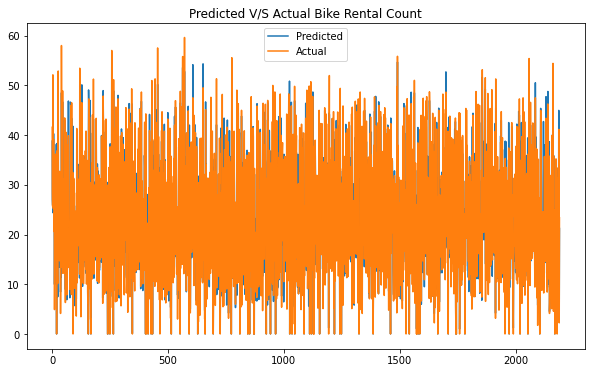

In [ ]:
line_plot(y_pred_rf,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


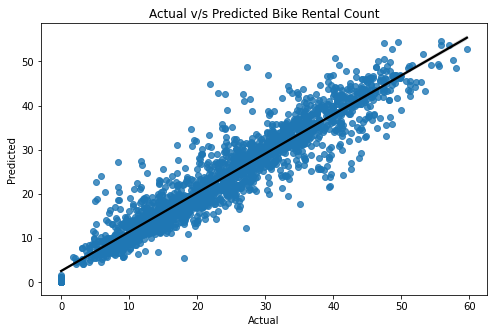

In [ ]:
scatter_plot(y_pred_rf,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


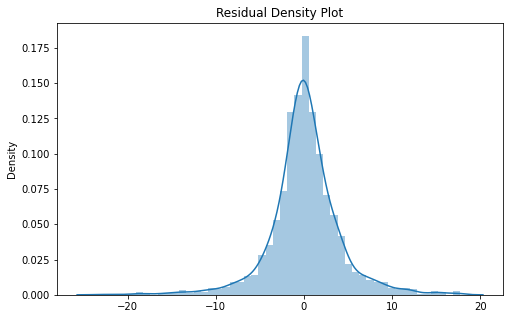

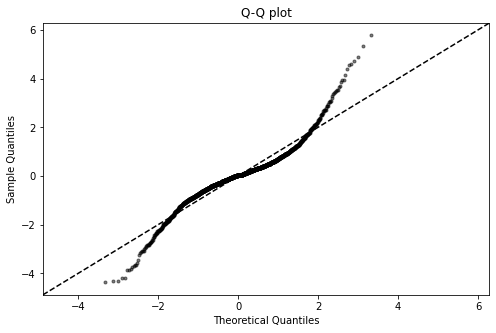

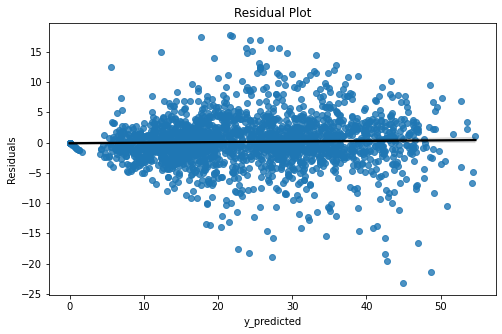

In [ ]:
residual_plot(y_pred_rf,y_test)

**Observation:**

* Error terms are normally distributed.
* Homoscedasticity exists.

**Random Forest Regressor: Hyperparameter Tuning**



In [ ]:
# Create the random grid
random_grid = {'n_estimators': range(100,700,100),
               'max_depth': range(5,20,1),
               'min_samples_split':range(2,5,1)}

# The parameter n_estimators creates n number of trees in your random forest
# This parameter represents the number of trees. Ideally, this should be increased until no further improvement is seen in the model. Good values might be a log scale from 10 to 1,000.

# max_depth: The number of splits that each decision tree is allowed to make

# min_samples_split: specifies the minimum number of samples required to split an internal node,

In [ ]:
#Run this cell only to obtain best parameters
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()
# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = GridSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

Tuned Decision Forest Parameters: {'max_depth': 19, 'min_samples_split': 3, 'n_estimators': 500}
Best score is 0.8848606814290646


In [ ]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(max_depth= 19, min_samples_split=3,n_estimators=500)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=19, min_samples_split=3, n_estimators=500)

In [ ]:
y_pred_train_rf_grid=Forest.predict(X_train)
y_pred_rf_grid=Forest.predict(X_test)

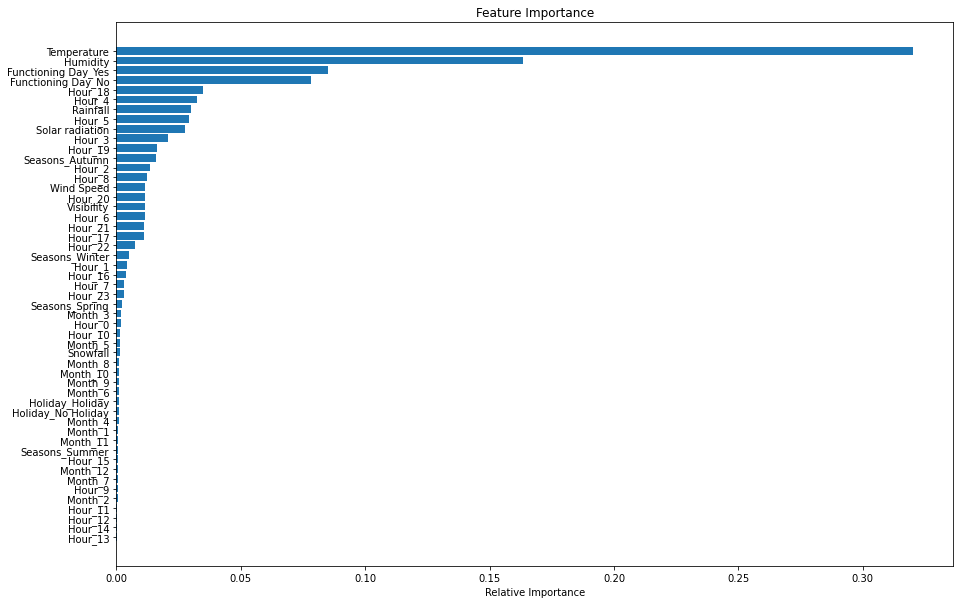

In [ ]:
get_features_importance(Forest,X_train)

* Most important features in the prediction include:

Temperature, Humidity, Functioning Day_No, Functioning Day_Yes, Hour_18, Hour_4, Rainfall and soon.

In [ ]:
#Evaluation on train dataset
evaluation("Random Forest GridSearchCV-train",y_train,y_pred_train_rf_grid)

The R2 Score is 0.959649220126977.


Model     MAE    MSE    RMSE  R2_score  \
1  Random Forest GridSearchCV-train  1.6175  6.304  2.5108    0.9596   

   Adjusted R2_score  
1             0.9597

In [ ]:
#Evaluation on test dataset
evaluation("Random Forest GridSearchCV-test",y_test,y_pred_rf_grid)

The R2 Score is 0.8891821325625321.


Model    MAE      MSE    RMSE  R2_score  \
1  Random Forest GridSearchCV-test  2.794  16.7718  4.0953    0.8892   

   Adjusted R2_score  
1             0.8892

**Observation:**

* Decrease in model performance is observed after hyperparameter tuning.
* Hyperparameter tuning decreased the overfitting.

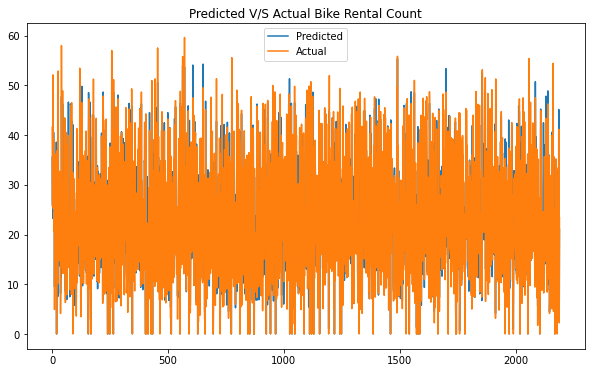

In [ ]:
line_plot(y_pred_rf_grid,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


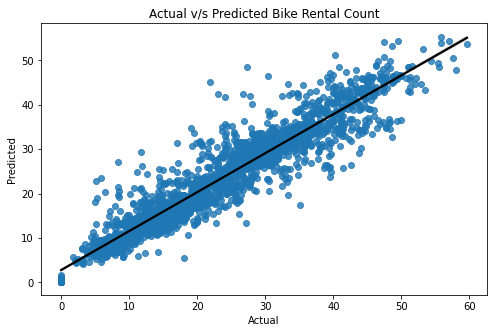

In [ ]:
scatter_plot(y_pred_rf_grid,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


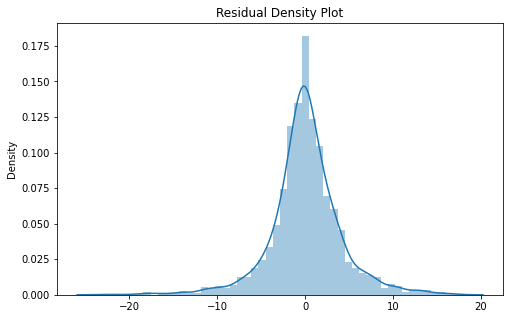

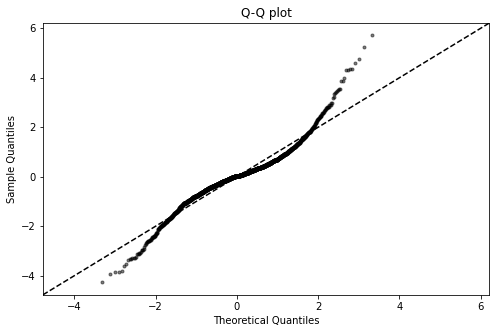

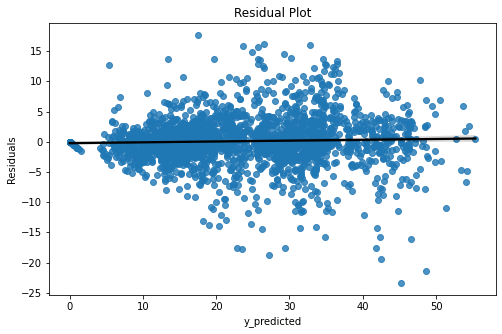

In [ ]:
residual_plot(y_pred_rf_grid,y_test)

**Observation:**

* Error terms are normally distributed.
* Homoscedasticity exists.
* From the Residual Plot(Residuals v/s y_predicted) it can be pbserved that:
  * Points are pretty symmetrically distributed, tending to cluster towards the middle of the plot.
  * They’re clustered around the lower single digits of the y-axis.
  * And there aren’t any clear patterns.
* This implies that the residual plot is ideal and the error terms have constant variance (Homoscadastic).

# **Model 5: Boosting [Gradient Boosting Regressor]**

In [ ]:
gradboost_reg=GradientBoostingRegressor()
gradboost_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
gradboost_reg.score(X_train,y_train)

0.864542433847941

In [ ]:
gradboost_reg.score(X_test,y_test)

0.8530454093365861

In [ ]:
y_pred_train_gb=gradboost_reg.predict(X_train)
y_pred_gb=gradboost_reg.predict(X_test)

In [ ]:
#Evaluation on train dataset
evaluation("Gradient Boosting Regression-train",y_train,y_pred_train_gb)

The R2 Score is 0.864542433847941.


Model     MAE      MSE    RMSE  R2_score  \
1  Gradient Boosting Regression-train  3.4689  21.1626  4.6003    0.8645   

   Adjusted R2_score  
1             0.8646

In [ ]:
#Evaluation on test dataset
evaluation("Gradient Boosting Regression-test",y_test,y_pred_gb)

The R2 Score is 0.8530454093365861.


Model    MAE      MSE   RMSE  R2_score  \
1  Gradient Boosting Regression-test  3.525  22.2409  4.716     0.853   

   Adjusted R2_score  
1             0.8531

Observation:

* The performance improvement can be expected after hyperparameter tuning.

Evaluation Plots

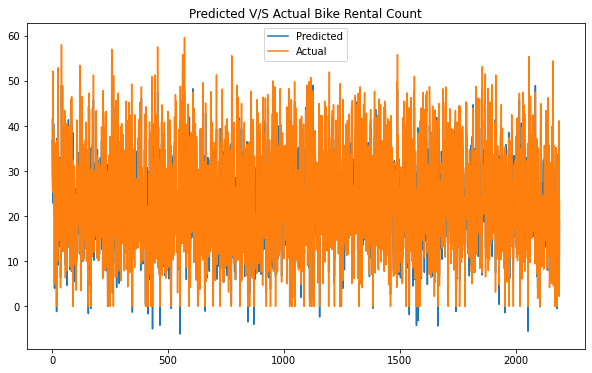

In [ ]:
line_plot(y_pred_gb,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


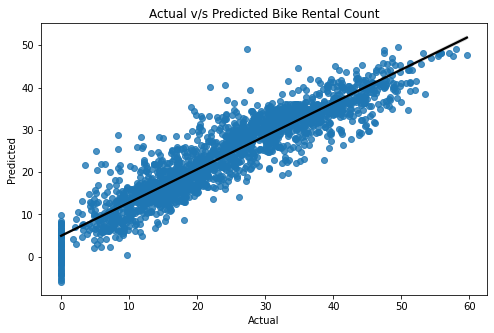

In [ ]:
scatter_plot(y_pred_gb,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


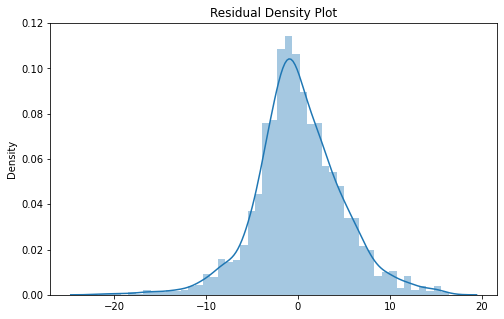

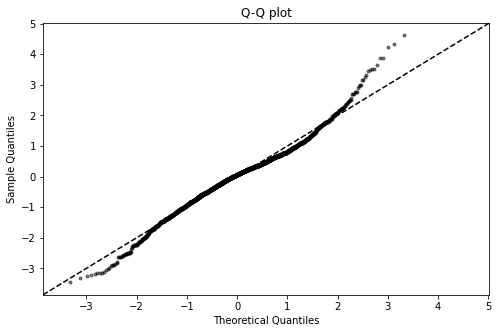

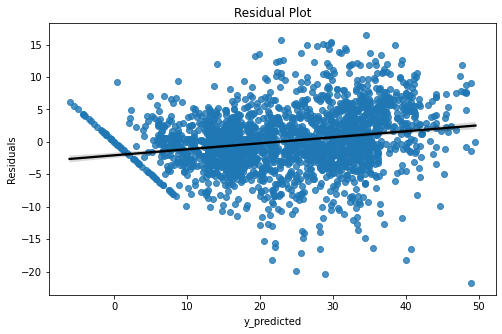

In [ ]:
residual_plot(y_pred_gb,y_test)

**Gradient Boosting Regressor: Hyperparameter Tuning** 

In [ ]:
# 1)n_estimators: the number of trees (weak learners) that are to be added in the model. The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

# 2)learning_rate:Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# There are no optimum values for learning rate as low values always work better, given that we train on sufficient number of trees. 

# 3)max_depth : Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; 
# The best value depends on the interaction of the input variables.
# A high number of trees can be computationally expensive that’s why I have taken few number of trees here.



In [ ]:
##Run this cell only once 

#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()
# creating param dict to check diffirent value of parameter
n_estimators=[70,80,100,150,200,250]
max_depth=[7,8,9,10,12,15]

params = {'n_estimators':n_estimators,'max_depth':max_depth }
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
#calling run_model to train,fit and evalution of gradient boosting model
gb_grid.fit(X_train,y_train)
gb_grid.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [ ]:
gradboo_grid=GradientBoostingRegressor(learning_rate=0.02,max_depth=8,n_estimators=150)
gradboo_grid.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=150)

In [ ]:
#  y preidictions on train data.
y_pred_train_gb_grid=gradboo_grid.predict(X_train)
# y predictions on test data
y_pred_gb_grid=gradboo_grid.predict(X_test)

In [ ]:
#Evaluation on train dataset
evaluation("Gradient Boosting GridSearchCV-train",y_train,y_pred_train_gb_grid)

The R2 Score is 0.9173410418156318.


Model     MAE      MSE    RMSE  R2_score  \
1  Gradient Boosting GridSearchCV-train  2.7249  12.9139  3.5936    0.9173   

   Adjusted R2_score  
1             0.9174

In [ ]:
#Evaluation on test dataset
evaluation("Gradient Boosting GridSearchCV-test",y_test,y_pred_gb_grid)

The R2 Score is 0.8703988364311745.


Model     MAE      MSE    RMSE  R2_score  \
1  Gradient Boosting GridSearchCV-test  3.2034  19.6146  4.4288    0.8704   

   Adjusted R2_score  
1             0.8705

Observation:

* Better generalization on test data (Optimal fit model).
* Could be considered for implementation.

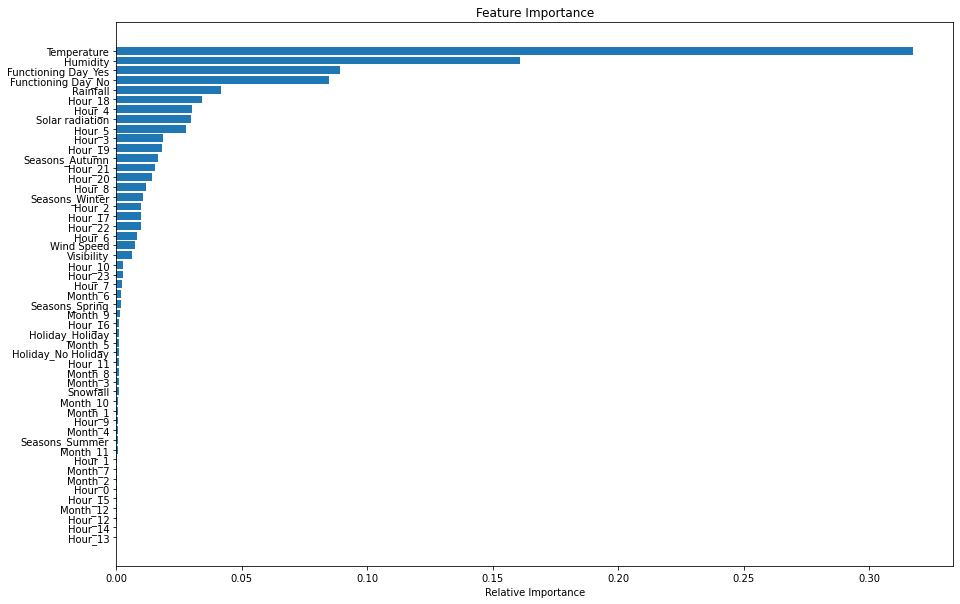

In [ ]:
get_features_importance(gradboo_grid,X_train)

* Most important features in the prediction include:

Temperature, Humidity, Functioning Day_Yes, Functioning Day_No, Rainfall, Hour_18, Hour_4 and soon.

Evaluation Plots

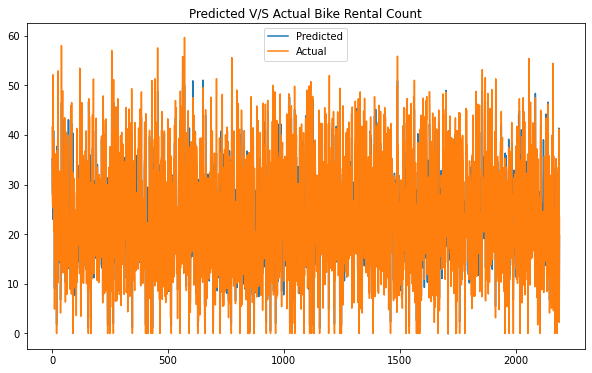

In [ ]:
line_plot(y_pred_gb_grid,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


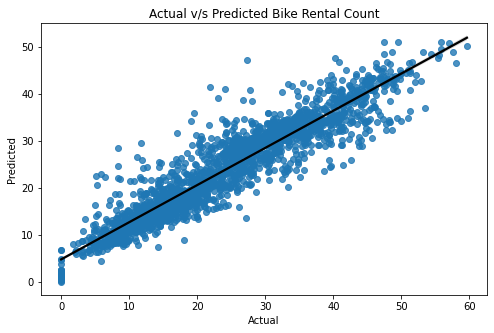

In [ ]:
scatter_plot(y_pred_gb_grid,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


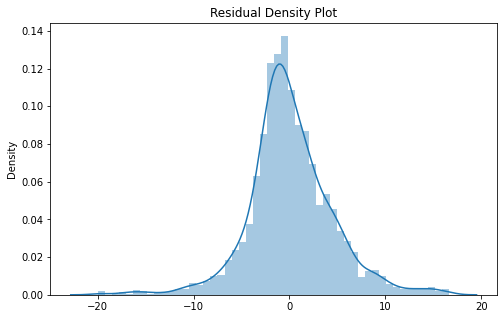

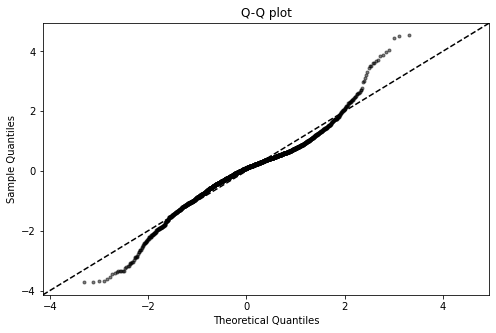

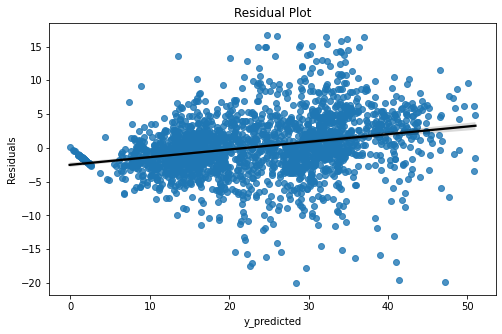

In [ ]:
residual_plot(y_pred_gb_grid,y_test)

**Observation:**

* Error terms are normally distributed. [Observed from the plots - density plot and q-q plot]
* From the Residual Plot(Residuals v/s y_predicted) it can be pbserved that:
  * Points are pretty symmetrically distributed, tending to cluster towards the middle of the plot.
  * They’re clustered around the lower single digits of the y-axis.
  * And there aren’t any clear patterns.
* This implies that the residual plot is ideal and the error terms have constant variance(Homoscadastic).

In [ ]:
feature_names=list(X_test.columns)

In [ ]:
for_instance=2
eli.show_prediction(gradboo_grid, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

# **Model 6: Boosting [Light Gradient Boosting Regressor]**

In [ ]:
lgbr=lgb.LGBMRegressor()
# finding the best parameters for LGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13,15,17]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)


In [ ]:
lgbr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 13, 15, 17],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
best_lgbr_model =lgbr_grid.best_estimator_
best_lgbr_model


LGBMRegressor(max_depth=15, n_estimators=250)

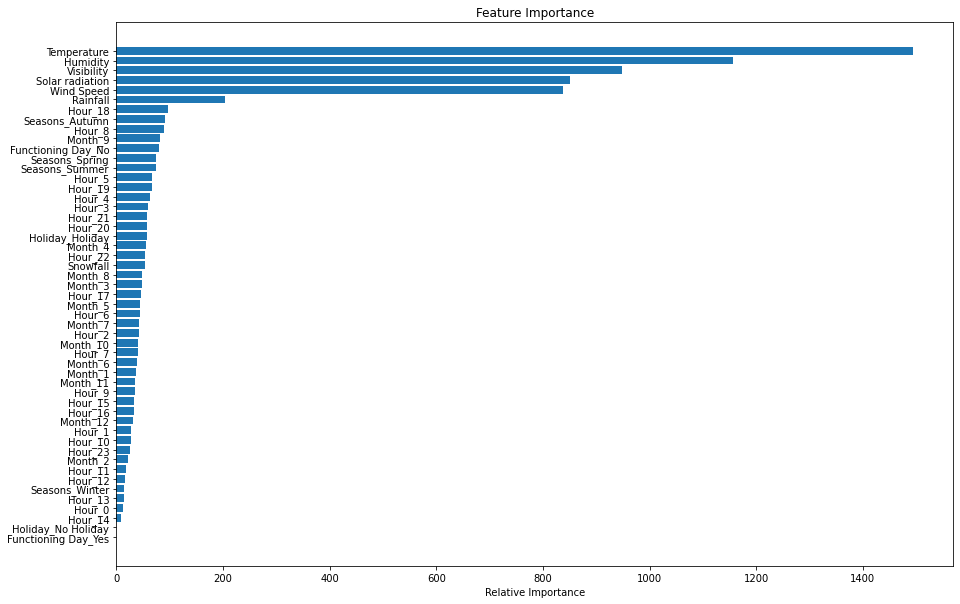

In [ ]:
get_features_importance(lgbr_grid.best_estimator_,X_train)

* Most important features in the prediction include:

Temperature, Humidity, Visibility, Solar radiation, Windspeed, Rainfall, Hour_18 and soon.
* It can be observed that the numerical features top the predictive analysis.

In [ ]:

#  y predictions on train data.
y_pred_train_lgbr_grid=lgbr_grid.predict(X_train)
# y predictions on test data
y_pred_lgbr_grid=lgbr_grid.predict(X_test)

In [ ]:
# Evaluation of train dataset
evaluation("Light Gradient Boosting GridSearchCV-train",y_train,y_pred_train_lgbr_grid)

The R2 Score is 0.9612814167663895.


Model     MAE    MSE    RMSE  \
1  Light Gradient Boosting GridSearchCV-train  1.7473  6.049  2.4595   

   R2_score  Adjusted R2_score  
1    0.9613             0.9613

In [ ]:
# Evaluation of train dataset
evaluation("Light Gradient Boosting GridSearchCV-test",y_test,y_pred_lgbr_grid)

The R2 Score is 0.9007541088492164.


Model     MAE      MSE    RMSE  \
1  Light Gradient Boosting GridSearchCV-test  2.6468  15.0204  3.8756   

   R2_score  Adjusted R2_score  
1    0.9008             0.9008

Observation:

* High performance compared to that of the gradient boosting algorithm.

Evaluation Plots

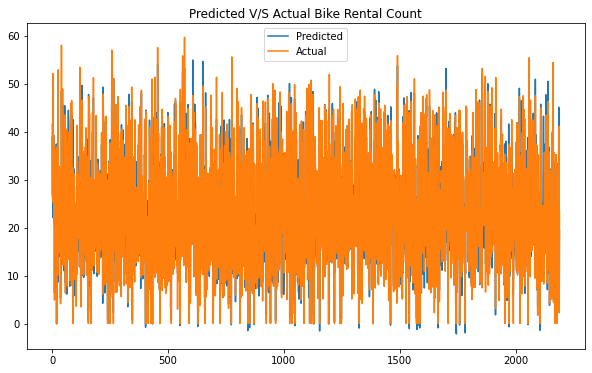

In [ ]:
line_plot(y_pred_lgbr_grid,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


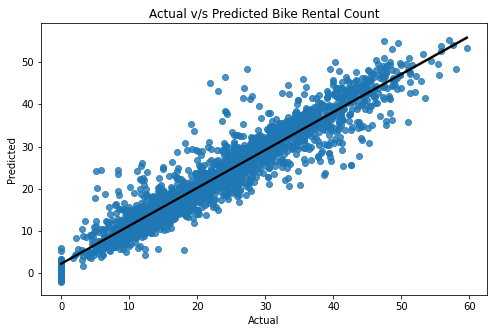

In [ ]:
scatter_plot(y_pred_lgbr_grid,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


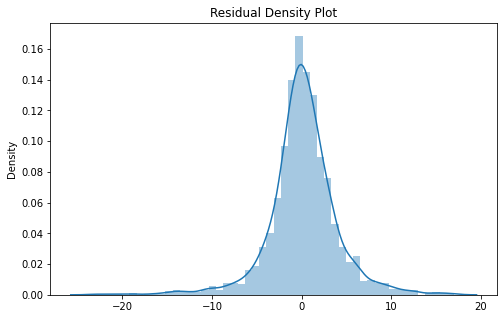

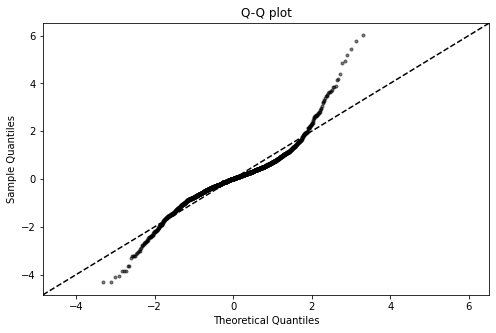

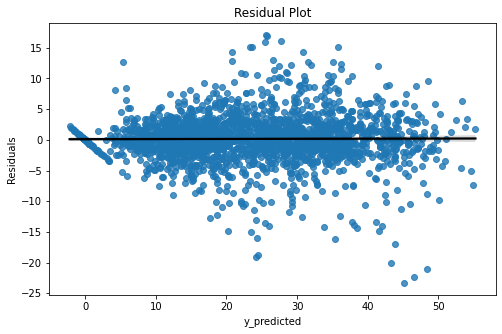

In [ ]:
residual_plot(y_pred_lgbr_grid,y_test)

**Observation:**

* Error terms are normally distributed. [Observed from the plots - density plot and q-q plot]
* From the Residual Plot(Residuals v/s y_predicted) it can be pbserved that:
  * Points are pretty symmetrically distributed, tending to cluster towards the middle of the plot.
  * They’re clustered around the lower single digits of the y-axis.
  * And there aren’t any clear patterns.
* This implies that the residual plot is ideal and the error terms have constant variance(Homoscadastic).


# **Model 7: Boosting [CatBoost Regressor]**

In [ ]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)

In [ ]:
cb_model.fit(X_train,y_train)


In [ ]:
#  y preidictions on train data.
y_pred_train_cb=cb_model.predict(X_train)
# y predictions on test data
y_pred_cb=cb_model.predict(X_test)

In [ ]:
#Evaluation of train dataset
evaluation("CatBoost Regression-train",y_train,y_pred_train_cb)

The R2 Score is 0.952291639773046.


Model     MAE     MSE    RMSE  R2_score  \
1  CatBoost Regression-train  1.9895  7.4535  2.7301    0.9523   

   Adjusted R2_score  
1             0.9523

In [ ]:
#Evaluation of test dataset
evaluation("CatBoost Regression-test",y_test,y_pred_cb)

The R2 Score is 0.9024717944178089.


Model    MAE      MSE    RMSE  R2_score  \
1  CatBoost Regression-test  2.641  14.7605  3.8419    0.9025   

   Adjusted R2_score  
1             0.9025

Observation:

* One of the best models with combitnation of high performance and optimal fit.
* Could be considered for implementation.

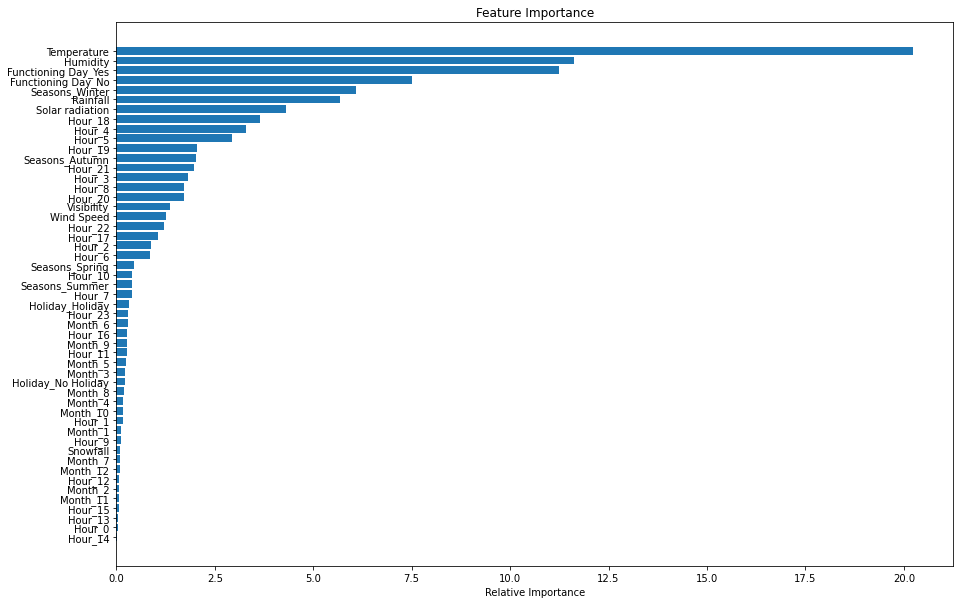

In [ ]:
get_features_importance(cb_model,X_train)

* Most important features in the prediction include:

Temperature, Humidity, Functioning Day_Yes, Functioning Day_No, Seasons Winter, Rainfall, Solar radiation and soon.

Evaluation Plots 

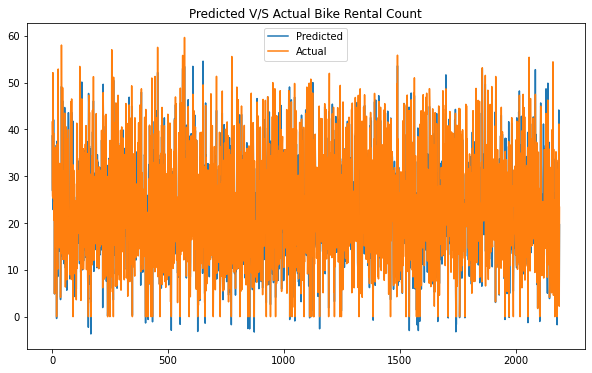

In [ ]:
line_plot(y_pred_cb,y_test)

The scatter plot shows the deviation of actual data points from the best fit line


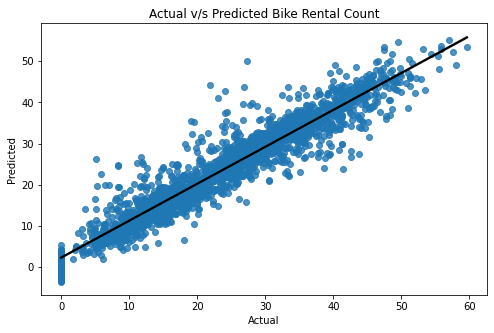

In [ ]:
scatter_plot(y_pred_cb,y_test)

1. Normal Distribution of error terms:  If the error terms are non- normally distributed or not
2. Second is q-q or quantile-quantile is a scatter plot that helps us validate the assumption of normal distribution in a data set.
   If yes, the plot would show a fairly straight line.
3. The residual vs fitted values plot {Residual Plot}. If there exist any pattern (may be, a parabolic shape), consider it as signs of non-linearity in the data.
   It means that the model doesn’t capture non-linear effects.
   If a funnel shape is evident in the plot, consider it as the sign of non-constant variance i.e. heteroscedasticity.
   Ideally there shouldn’t be any clear patterns.


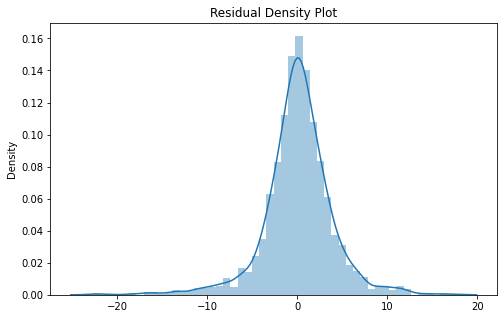

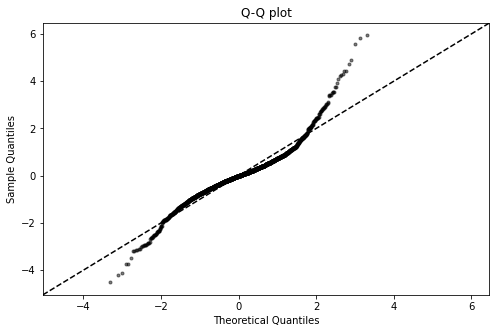

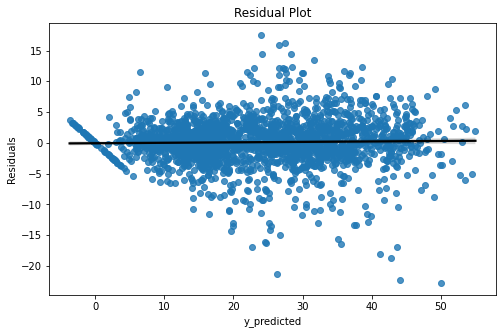

In [ ]:
residual_plot(y_pred_cb,y_test)

**Observation:**

* Error terms are normally distributed. [Observed from the plots - density plot and q-q plot]
* From the Residual Plot(Residuals v/s y_predicted) it can be pbserved that:
  * Points are pretty symmetrically distributed, tending to cluster towards the middle of the plot.
  * They’re clustered around the lower single digits of the y-axis.
  * And there aren’t any clear patterns.
* This implies that the residual plot is ideal and the error terms have constant variance.

#**Results Summary**

In [ ]:
df_results_train = pd.concat([evaluation("Linear Regression-train",y_train,y_pred_train),evaluation("Lasso Regression GridSearchCV-train",y_train,y_pred_train_lasso),evaluation("Ridge Regression GridSearchCV-train",y_train,y_pred_train_ridge),evaluation("Elastic-Net GridSearchCV-train",y_train,y_pred_train_elastic_grid),evaluation("Decision Tree Regression-train",y_train,y_pred_train_decision),evaluation("Decision Tree GridSearchCV-train",y_train,y_pred_train_decision_grid),evaluation("Random Forest Regression-train",y_train,y_pred_train_rf),evaluation("Random Forest GridSearchCV-train",y_train,y_pred_train_rf_grid),evaluation("Gradient Boosting Regression-train",y_train,y_pred_train_gb),evaluation("Gradient Boosting GridSearchCV-train",y_train,y_pred_train_gb_grid),evaluation("Light Gradient Boosting GridSearchCV-train",y_train,y_pred_train_lgbr_grid),evaluation("CatBoost Regression-train",y_train,y_pred_train_cb)])


The R2 Score is 0.7626385881123962.
The R2 Score is 0.7626107274299467.
The R2 Score is 0.762639003382375.
The R2 Score is 0.7626238260874922.
The R2 Score is 0.8032444643444457.
The R2 Score is 0.8856661565667266.
The R2 Score is 0.9849022047445933.
The R2 Score is 0.959649220126977.
The R2 Score is 0.864542433847941.
The R2 Score is 0.9173410418156318.
The R2 Score is 0.9612814167663895.
The R2 Score is 0.952291639773046.


In [ ]:
df_results_train

Model     MAE      MSE    RMSE  \
1                     Linear Regression-train  4.6532  37.0831  6.0896   
1         Lasso Regression GridSearchCV-train  4.6538  37.0875  6.0899   
1         Ridge Regression GridSearchCV-train  4.6533  37.0830  6.0896   
1              Elastic-Net GridSearchCV-train  4.6548  37.0854  6.0898   
1              Decision Tree Regression-train  3.8867  30.7392  5.5443   
1            Decision Tree GridSearchCV-train  2.8382  17.8624  4.2264   
1              Random Forest Regression-train  1.0206   2.3587  1.5358   
1            Random Forest GridSearchCV-train  1.6175   6.3040  2.5108   
1          Gradient Boosting Regression-train  3.4689  21.1626  4.6003   
1        Gradient Boosting GridSearchCV-train  2.7249  12.9139  3.5936   
1  Light Gradient Boosting GridSearchCV-train  1.7473   6.0490  2.4595   
1                   CatBoost Regression-train  1.9895   7.4535  2.7301   

   R2_score  Adjusted R2_score  
1    0.7626             0.7627  
1    0.7626             0.7626  
1    0.7626             0.7627  
1    0.7626             0.7627  
1    0.8032             0.8033  
1    0.8857             0.8857  
1    0.9849             0.9849  
1    0.9596             0.9597  
1    0.8645             0.8646  
1    0.9173             0.9174  
1    0.9613             0.9613  
1    0.9523             0.9523

In [ ]:
df_results_test = pd.concat([evaluation("Linear Regression-test",y_test,y_pred),evaluation("Lasso Regression GridSearchCV-test",y_test,y_pred_lasso),evaluation("Ridge Regression GridSearchCV-test",y_test,y_pred_ridge),evaluation("Elastic-Net GridSearchCV-test",y_test,y_pred_elastic_grid),evaluation("Decision Tree Regression-test",y_test,y_pred_decision),evaluation("Decision Tree GridSearchCV-test",y_test,y_pred_decision_grid),evaluation("Random Forest Regression-test",y_test,y_pred_rf),evaluation("Random Forest GridSearchCV-test",y_test,y_pred_rf_grid),evaluation("Gradient Boosting Regression-test",y_test,y_pred_gb),evaluation("Gradient Boosting GridSearchCV-test",y_test,y_pred_gb_grid),evaluation("Light Gradient Boosting GridSearchCV-test",y_test,y_pred_lgbr_grid),evaluation("CatBoost Regression-test",y_test,y_pred_cb)])


The R2 Score is 0.740763323067954.
The R2 Score is 0.7416654131860254.
The R2 Score is 0.7408154307737905.
The R2 Score is 0.7418552997784498.
The R2 Score is 0.7558798151367694.
The R2 Score is 0.8083847023387614.
The R2 Score is 0.8929514069317781.
The R2 Score is 0.8891821325625321.
The R2 Score is 0.8530454093365861.
The R2 Score is 0.8703988364311745.
The R2 Score is 0.9007541088492164.
The R2 Score is 0.9024717944178089.


In [ ]:
df_results_test

Model     MAE      MSE    RMSE  \
1                     Linear Regression-test  4.6494  39.2343  6.2637   
1         Lasso Regression GridSearchCV-test  4.6477  39.0978  6.2528   
1         Ridge Regression GridSearchCV-test  4.6493  39.2264  6.2631   
1              Elastic-Net GridSearchCV-test  4.6498  39.0690  6.2505   
1              Decision Tree Regression-test  4.3900  36.9465  6.0784   
1            Decision Tree GridSearchCV-test  3.7566  29.0001  5.3852   
1              Random Forest Regression-test  2.7017  16.2013  4.0251   
1            Random Forest GridSearchCV-test  2.7940  16.7718  4.0953   
1          Gradient Boosting Regression-test  3.5250  22.2409  4.7160   
1        Gradient Boosting GridSearchCV-test  3.2034  19.6146  4.4288   
1  Light Gradient Boosting GridSearchCV-test  2.6468  15.0204  3.8756   
1                   CatBoost Regression-test  2.6410  14.7605  3.8419   

   R2_score  Adjusted R2_score  
1    0.7408             0.7409  
1    0.7417             0.7418  
1    0.7408             0.7409  
1    0.7419             0.7420  
1    0.7559             0.7560  
1    0.8084             0.8085  
1    0.8930             0.8930  
1    0.8892             0.8892  
1    0.8530             0.8531  
1    0.8704             0.8705  
1    0.9008             0.9008  
1    0.9025             0.9025

In [ ]:
def evaluation_summary(model,y_actual_train,y_pred_train,y_actual,y_pred):
  
  #Calculate  Mean Squared Error

  MSE_train=mean_squared_error(y_actual_train,y_pred_train)
  MSE_test=mean_squared_error(y_actual,y_pred)

  var_train = y_actual_train.var()
  Adj_rsquare_train = 1-(MSE_train/var_train)

  var_test = y_actual.var()
  Adj_rsquare_test = 1-(MSE_test/var_test)

  dictionary={'Model':model,
              
             'MSE-train':round(MSE_train,4),
             'MSE-test':round(MSE_test,4),

             'Adjusted R2_score-train': round(Adj_rsquare_train,4),
             'Adjusted R2_score-test': round(Adj_rsquare_test,4)
              }

  # create training_result dataframe
  return pd.DataFrame(dictionary,index=[1])

In [ ]:
results_summary = pd.concat([evaluation_summary("Linear Regression",y_train,y_pred_train,y_test,y_pred),evaluation_summary("Lasso Regression GridSearchCV",y_train,y_pred_train_lasso,y_test,y_pred_lasso),evaluation_summary("Ridge Regression GridSearchCV",y_train,y_pred_train_ridge,y_test,y_pred_ridge),evaluation_summary("Elastic-Net GridSearchCV",y_train,y_pred_train_elastic_grid,y_test,y_pred_elastic_grid),evaluation_summary("Decision Tree Regression",y_train,y_pred_train_decision,y_test,y_pred_decision),evaluation_summary("Decision Tree GridSearchCV",y_train,y_pred_train_decision_grid,y_test,y_pred_decision_grid),evaluation_summary("Random Forest Regression",y_train,y_pred_train_rf,y_test,y_pred_rf),evaluation_summary("Random Forest GridSearchCV",y_train,y_pred_train_rf_grid,y_test,y_pred_rf_grid),evaluation_summary("Gradient Boosting Regression",y_train,y_pred_train_gb,y_test,y_pred_gb),evaluation_summary("Gradient Boosting GridSearchCV",y_train,y_pred_train_gb_grid,y_test,y_pred_gb_grid),evaluation_summary("Light Gradient Boosting GridSearchCV",y_train,y_pred_train_lgbr_grid,y_test,y_pred_lgbr_grid),evaluation_summary("CatBoost Regression",y_train,y_pred_train_cb,y_test,y_pred_cb)])


In [ ]:
results_summary

Model  MSE-train  MSE-test  \
1                     Linear Regression    37.0831   39.2343   
1         Lasso Regression GridSearchCV    37.0875   39.0978   
1         Ridge Regression GridSearchCV    37.0830   39.2264   
1              Elastic-Net GridSearchCV    37.0854   39.0690   
1              Decision Tree Regression    30.7392   36.9465   
1            Decision Tree GridSearchCV    17.8624   29.0001   
1              Random Forest Regression     2.3587   16.2013   
1            Random Forest GridSearchCV     6.3040   16.7718   
1          Gradient Boosting Regression    21.1626   22.2409   
1        Gradient Boosting GridSearchCV    12.9139   19.6146   
1  Light Gradient Boosting GridSearchCV     6.0490   15.0204   
1                   CatBoost Regression     7.4535   14.7605   

   Adjusted R2_score-train  Adjusted R2_score-test  
1                   0.7627                  0.7409  
1                   0.7626                  0.7418  
1                   0.7627                  0.7409  
1                   0.7627                  0.7420  
1                   0.8033                  0.7560  
1                   0.8857                  0.8085  
1                   0.9849                  0.8930  
1                   0.9597                  0.8892  
1                   0.8646                  0.8531  
1                   0.9174                  0.8705  
1                   0.9613                  0.9008  
1                   0.9523                  0.9025

# **Conclusion**

Considering the "SeoulBikeData" dataset, the exploratory and predictive analysis has been carried out and, following conclusions can be made:

* The dataset with 10 numerical features and 4 categorical features very well explains the bike rental count in the city and is further explored and analyzed to draw some meaningful predictions/insights.
* The outliers in the features have been handled by robust scaling.
* The exploratory data analysis gives insights into the dependency between features, their relationship with the target variable and various trends.
  * Bike rental count is seen to follow a certain trend to grow high during peak hours, seasons and functioning hours.
  * Bike rental count tends to increase with the increase in temperature, indicating that people tend to avoid bikes during low temperatures.

* Various models have been fitted onto the prepared dataset and the following comparisons can be made:
  * Linear Regression model fails to capture the details in the data and the extreme high coefficients of certain features can bias the model towards the same. Hence looking for regularization.
  * Regularization helped in regularizing the model coefficients and smoothening the coefficients plot. Though no prominent improvements in the performance are seen after regularization.
  * Non-linear model- Decision Tree succeeded in capturing the non-linearities in the data that the linear model couldn't capture, hence leading to the improved performance, which was further improved by hyperparameter tuning but led to an overfitted model. 
  * Random forest model got further improvement in the performance but was still overfit, that was further reduced by hyperparameter tuning.
  * Started off boosting ensemble models with the '*Gradient Boosting*' algorithm that performed comparatively weaker than previous non-linear models.
The performance improved highly on hyperparameter tuning and obtained an optimally fit model with high performance.
  
    Further carried on with 'LGB' model and 'CatBoost' model resulting in the most optimal fit models with adjusted r2 score of [LGB: 0.9613(train), 0.9008(test)] and [CatBoost: 0.9523(train) and 0.9025(test)].

* It is safe to conclude that models namely 'Random Forest GridSearchCV','Gradient Boosting GridsearchCV', 'Light Gradient Boosting' and 'CatBoost' are fit to be considered for application/implementation purposes.

* **Temperature and Humidity** remain the most important features in ensemble predictive models [Random Forest, Gradient Boosting, Light GBM, CatBoost]. This implies that temperature and humidity are the most crucial features in deciding the bike rental count.

* **Functioning Day, Solar radiation, Rainfall and Hour_18** are the others among the most important features in most of the optimally performing models.
  * This implies the fact that the prediction of bike count is high during functioning hours. 
  * The higher the rainfall, the lesser the bike rents.
  * Higher the solar radiation, the more the bike rents.
  * And 6:00 pm being one of the peak hours is one among the most important factors in prediction.